In [1]:
import io


from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
from reportlab.graphics.shapes import *

import PIL.Image
import matplotlib.pyplot as plt

In [2]:
doc = svg2rlg("./realms_continent.svg")

Unable to find a clipping path with id state-clip1
Unable to find a clipping path with id state-clip3
Unable to find a clipping path with id state-clip6
Unable to find a clipping path with id state-clip9
Unable to find a clipping path with id state-clip10
Unable to find a clipping path with id state-clip12
Unable to find a clipping path with id state-clip15


In [3]:
doc.contents[0]

In [4]:
buffer = io.BytesIO()
renderPM.drawToFile(doc, buffer, fmt="PNG")
img = PIL.Image.open(buffer)

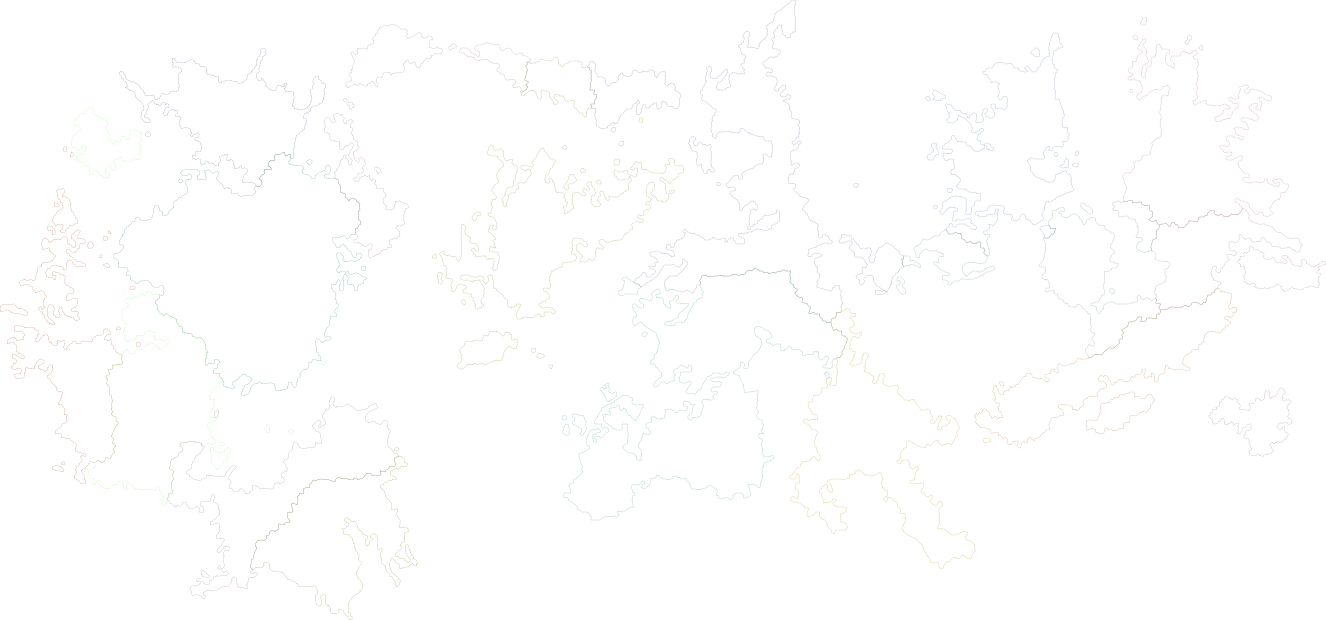

In [5]:
img

In [6]:
print(1330/2)
print(665/170)
print(620/2)
print(310/80)
print((610-310)/3.9)

665.0
3.911764705882353
310.0
3.875
76.92307692307692


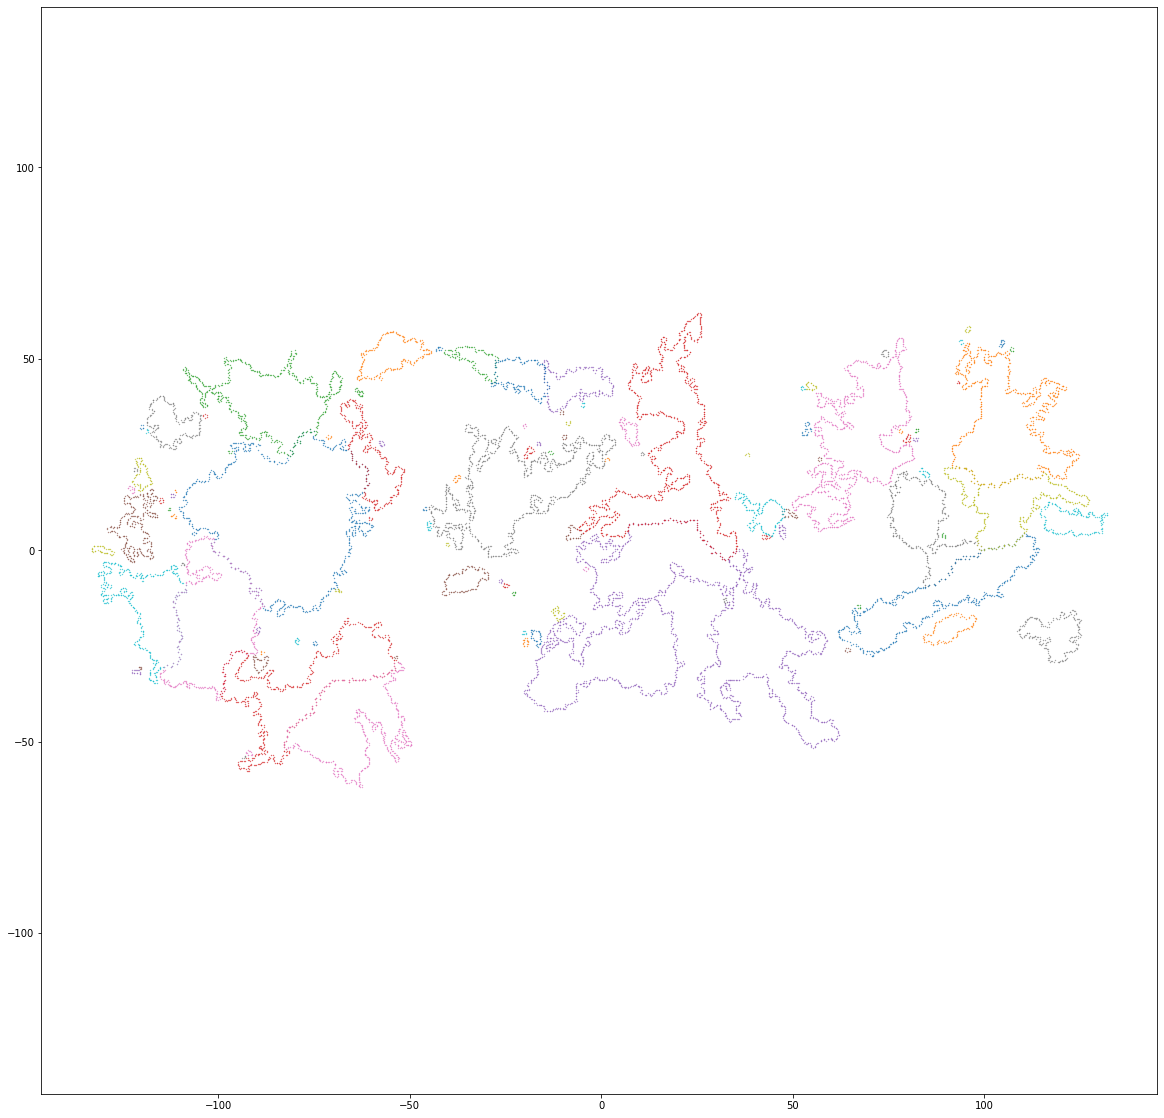

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

orders = []
for continent in doc.contents[0].contents:
    points = continent.contents[0].points
    operators = continent.contents[0].operators
    
    islands = []
    coordinates = None
    offset = 0
    for i, op in enumerate(operators[:-1]):
        try:
            if op == 0:
                if coordinates is None:
                    coordinates = []
                else:
                    islands.append(coordinates)
                    coordinates = []
            elif op == 3:
                offset += 1
            else:
                coordinates.append([
                    (points[2*(i-offset)]-665.)/5.,
                    -(points[2*(i-offset)+1]-310.)/5.
                ])
        except:
            print(len(operators), 2*len(operators))
            print(sum([1 for x in operators if x==3]))
            print(len(points))
            break
    if len(coordinates) > 0:
        islands.append(coordinates)
    orders.append(islands)
    
for islands in orders:
    for island in islands:
        x = np.array(island)
        plt.scatter(x[:,0], x[:,1], s=0.1)
plt.axis("equal")
plt.show()

In [8]:
order_data = {
    "Power": {"pairing": 1, "primary_attunement": "Light", "secondary_attunement": "Strenght"},
    "Giants": {"pairing": 2, "primary_attunement": "Light", "secondary_attunement": "Strenght"},
    "Titans": {"pairing": 3, "primary_attunement": "Light", "secondary_attunement": "Strenght"},
    "Skill": {"pairing": 4, "primary_attunement": "Light", "secondary_attunement": "Strenght"},
    "Perfection": {"pairing": 5, "primary_attunement": "Light", "secondary_attunement": "Light"},
    "Brilliance": {"pairing": 6, "primary_attunement": "Light", "secondary_attunement": "Light"},
    "Enlightenment": {"pairing": 7, "primary_attunement": "Light", "secondary_attunement": "Light"},
    "Protection": {"pairing": 8, "primary_attunement": "Light", "secondary_attunement": "Light"},
    "Anger": {"pairing": 8, "primary_attunement": "Dark", "secondary_attunement": "Dark"},
    "Rage": {"pairing": 7, "primary_attunement": "Dark", "secondary_attunement": "Dark"},
    "Fury": {"pairing": 6, "primary_attunement": "Dark", "secondary_attunement": "Dark"},
    "Vitriol": {"pairing": 5, "primary_attunement": "Dark", "secondary_attunement": "Dark"},
    "the Fox": {"pairing": 4, "primary_attunement": "Dark", "secondary_attunement": "Cunning"},
    "Detection": {"pairing": 3, "primary_attunement": "Dark", "secondary_attunement": "Cunning"},
    "Reflection": {"pairing": 2, "primary_attunement": "Dark", "secondary_attunement": "Cunning"},
    "the Twins": {"pairing": 1, "primary_attunement": "Dark", "secondary_attunement": "Cunning"},
}

svg_sequence = [
    "Rage",
    "Detection",
    "Anger",
    "Giants",
    "Skill",
    "Enlightenment",
    "Power",
    "Brilliance",
    "Perfection",
    "Titans",
    "Fury",
    "Reflection",
    "the Twins",
    "Vitriol",
    "the Fox",
    "Protection"
]



In [9]:
for order_idx, islands in enumerate(orders):
    for isl_idx, island in enumerate(islands):
        filtered_coordinates = [[0,0]]
        for co_idx, coordinate in enumerate(island):
            all_other_coordinates = np.array(filtered_coordinates)
            if np.min(np.sum(np.abs(all_other_coordinates - coordinate), axis=1)) < 1e-4:
                continue
            else:
                filtered_coordinates.append(coordinate)
        orders[order_idx][isl_idx] = filtered_coordinates[1:]

In [10]:
coasts = []
for idx, islands in enumerate(orders):
    print(".",end="")
    all_other_coordinates = []
    for other_idx, other_islands in enumerate(orders):
        print("/",end="")
        if idx != other_idx:
            for coordinates in other_islands:
                for coordinate in coordinates:
                    all_other_coordinates.append(coordinate)
    all_other_coordinates = np.array(all_other_coordinates)
    
    coast = []
    for coordinates in islands:
        part = []
        for coordinate in coordinates:
            if np.min(np.sum(np.abs(all_other_coordinates - coordinate), axis=1)) < 1e-3:
                if len(part) > 1:
                    coast.append(part)
                    part = []
            else:
                part.append(coordinate)
        if len(part) > 1:
            coast.append(part)
    coasts.append(coast)

.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////.////////////////

In [11]:
len(coasts)

16

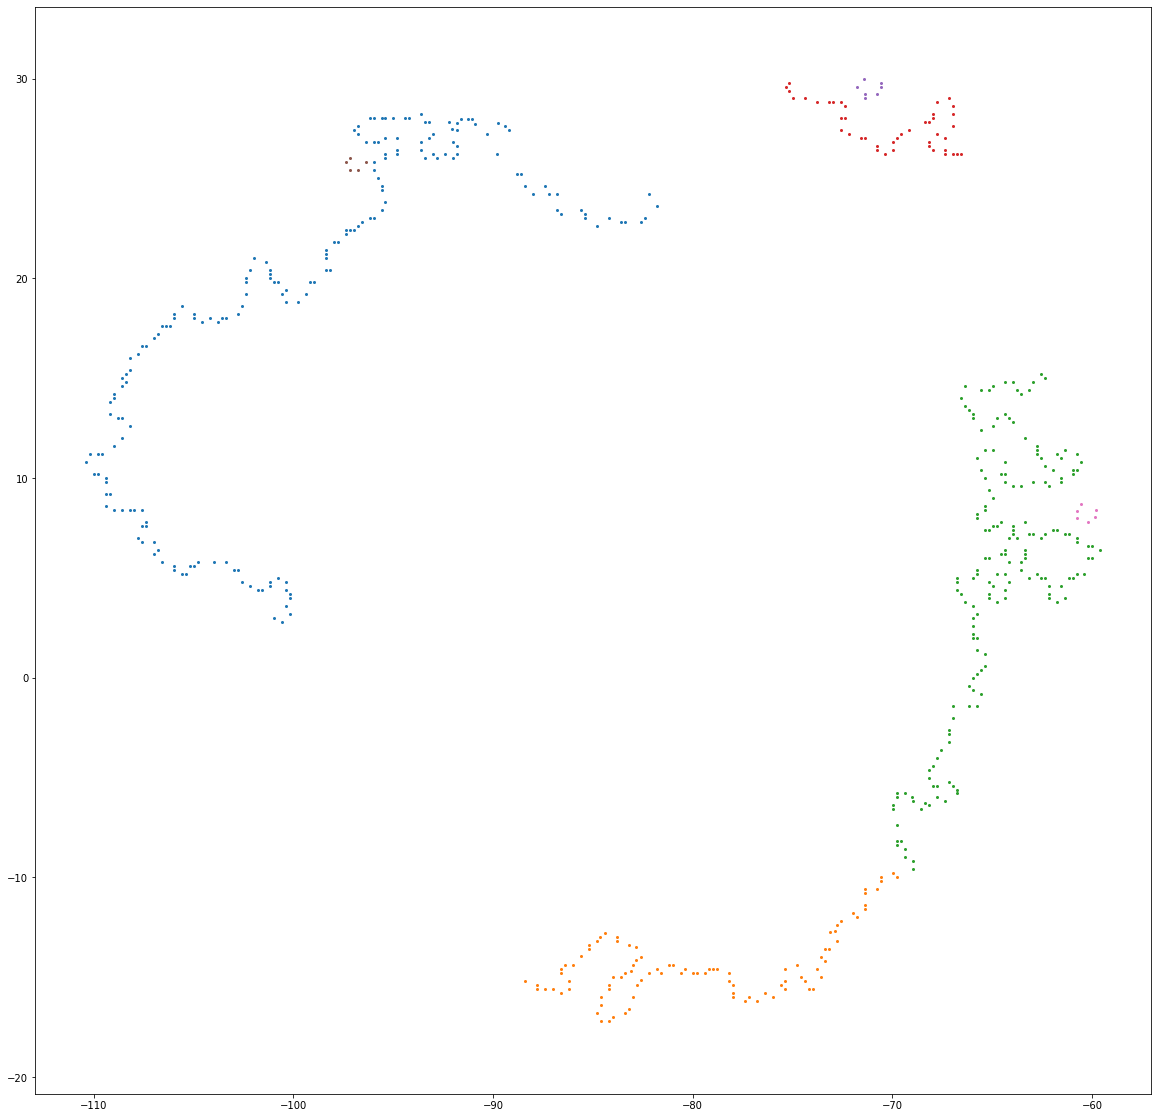

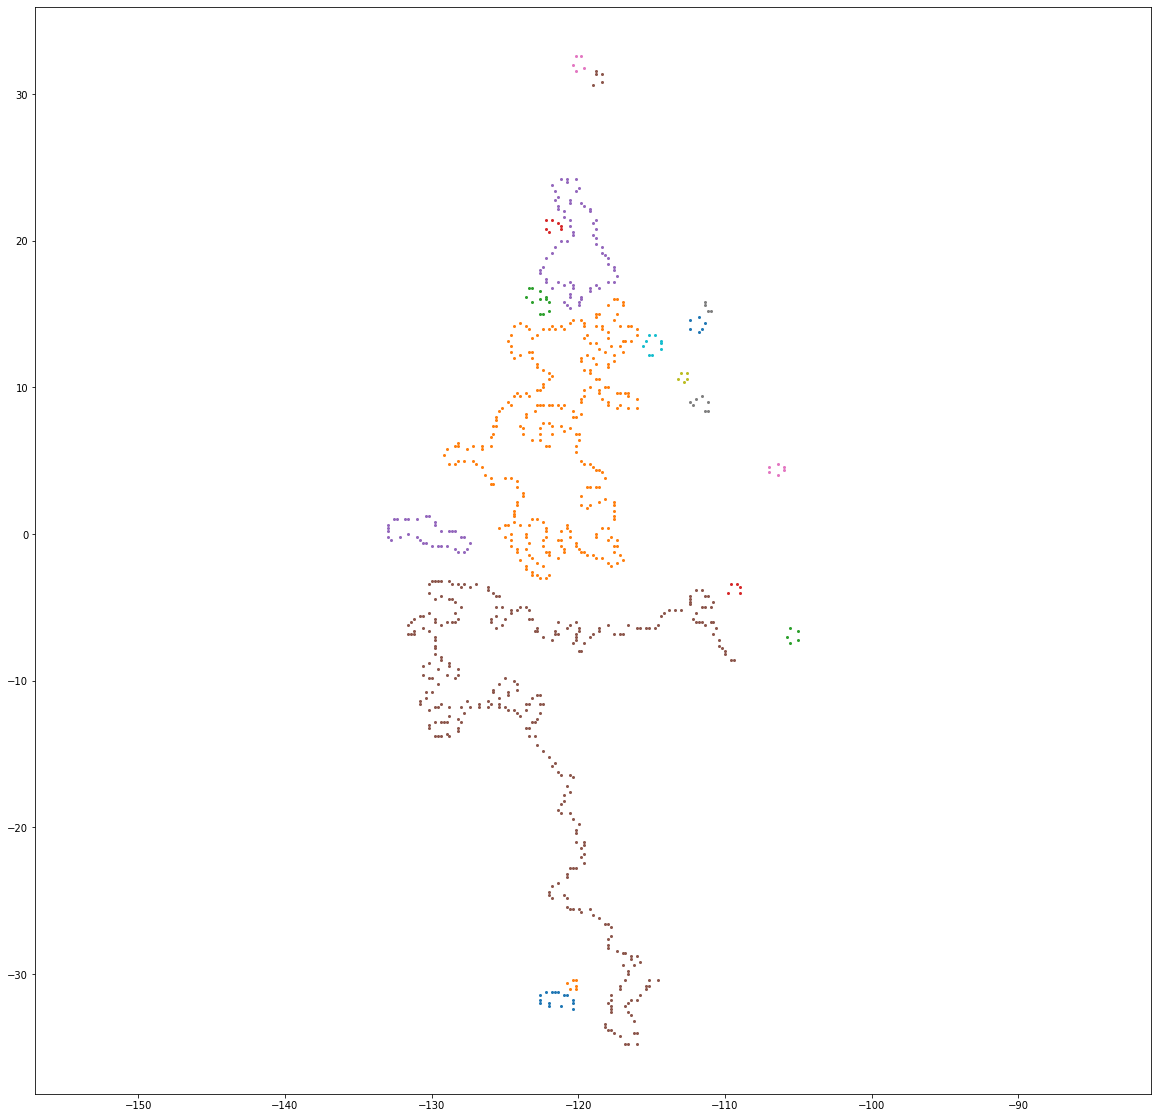

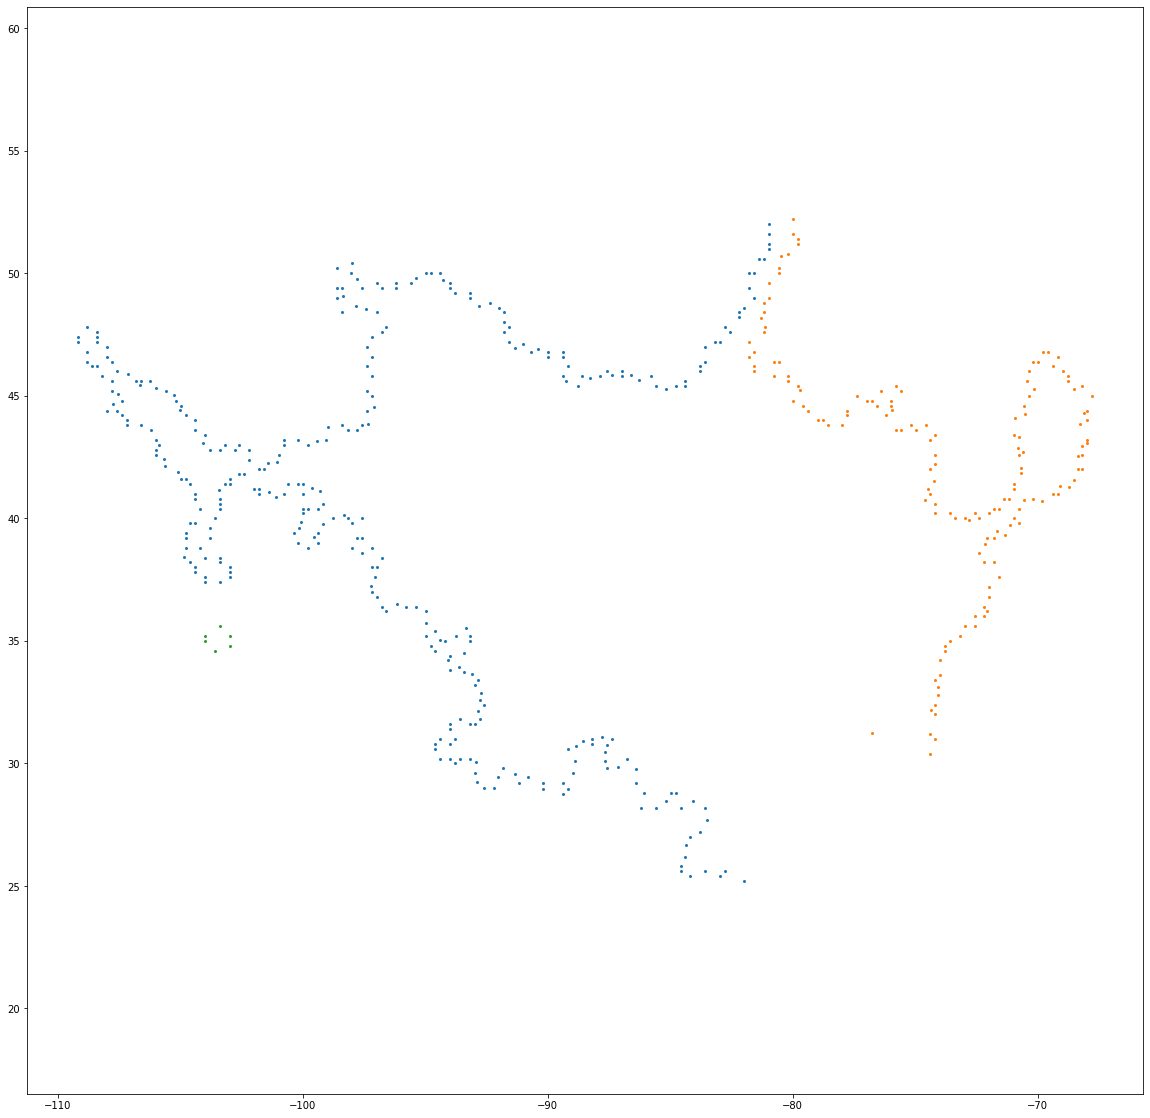

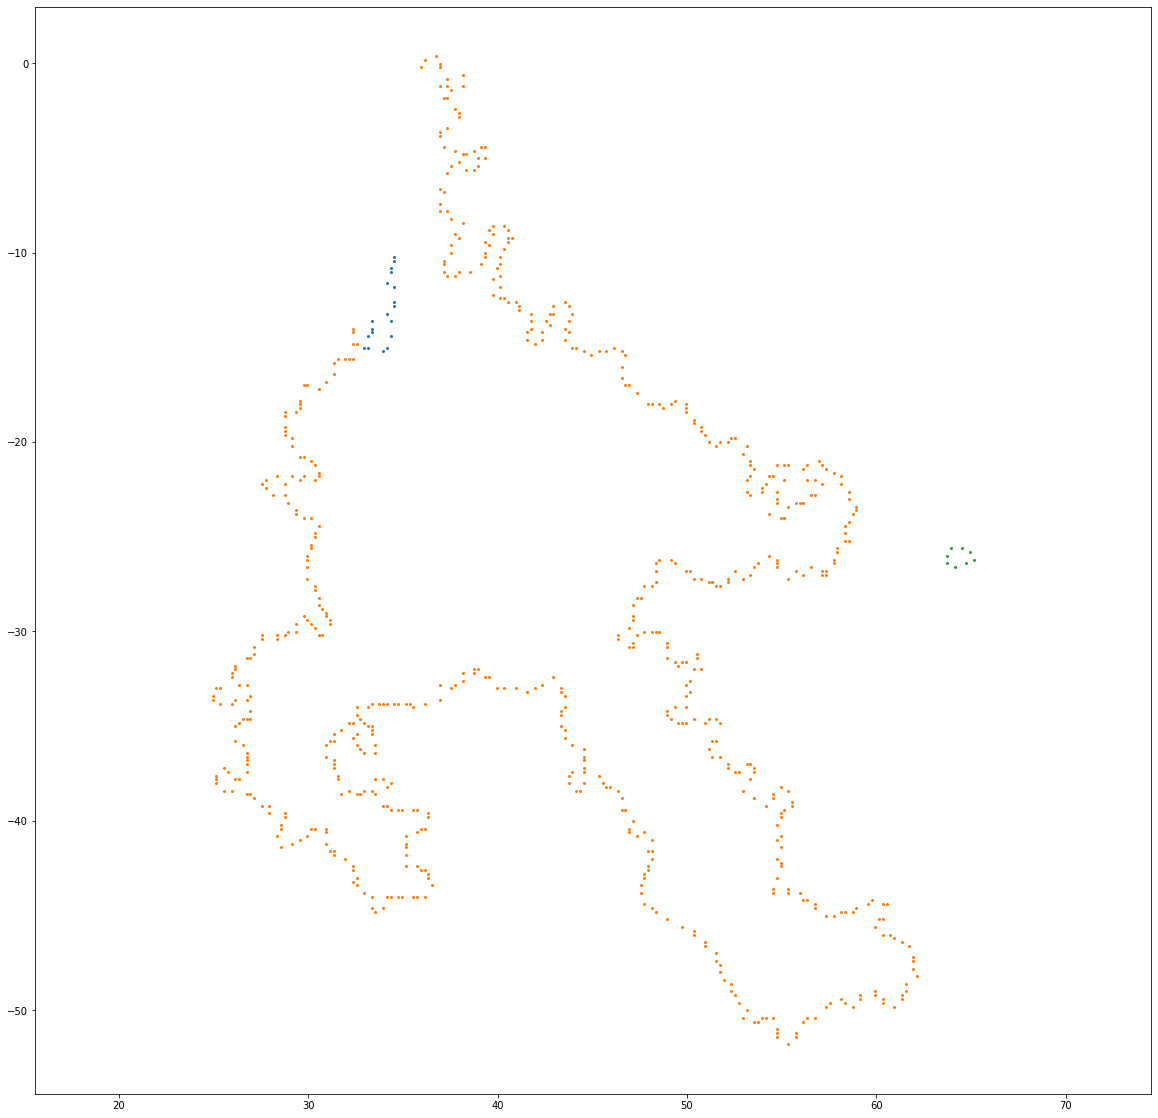

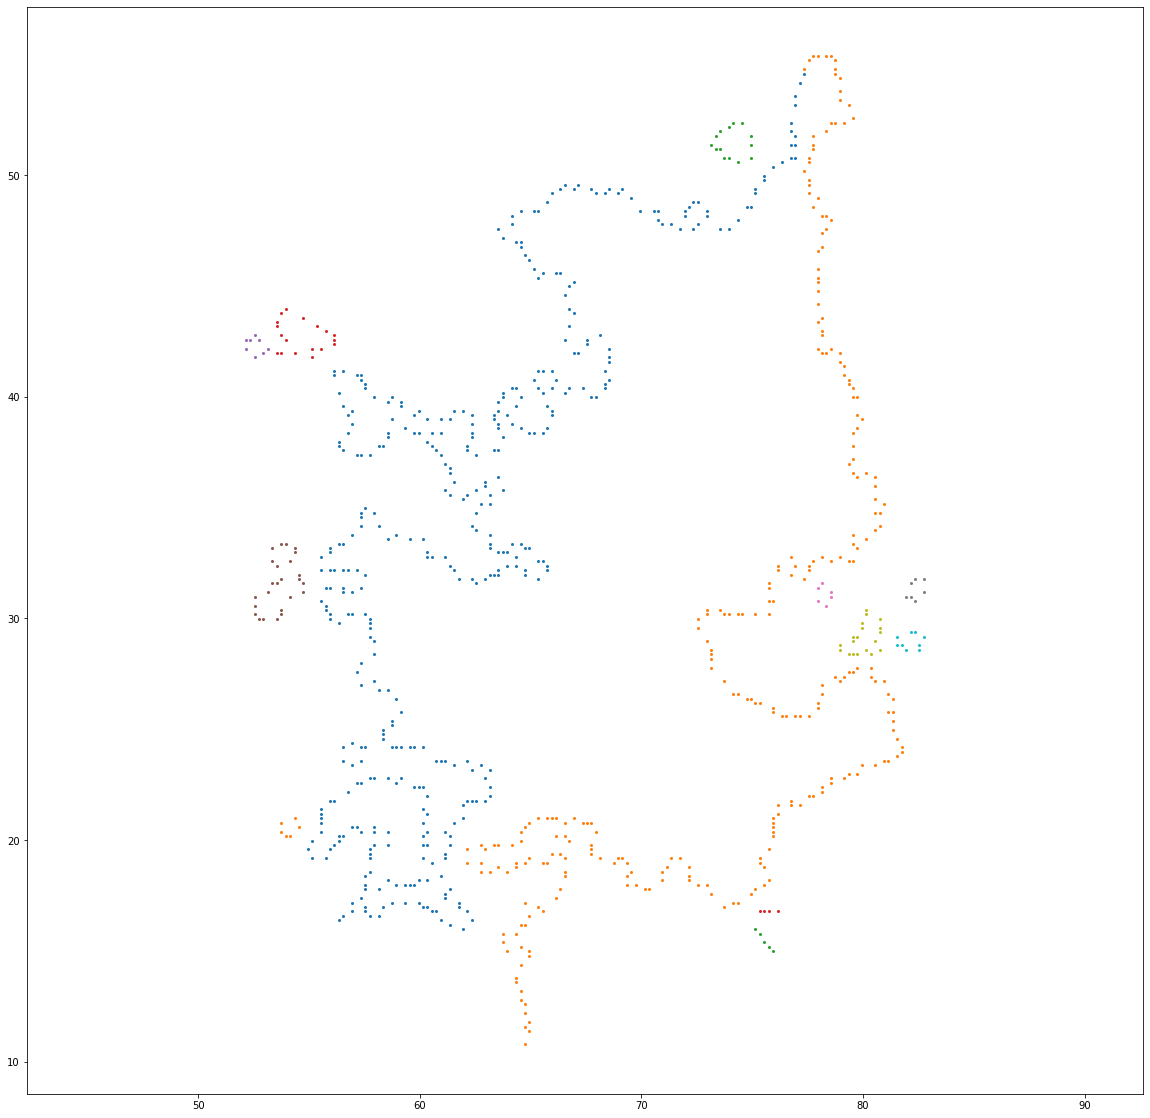

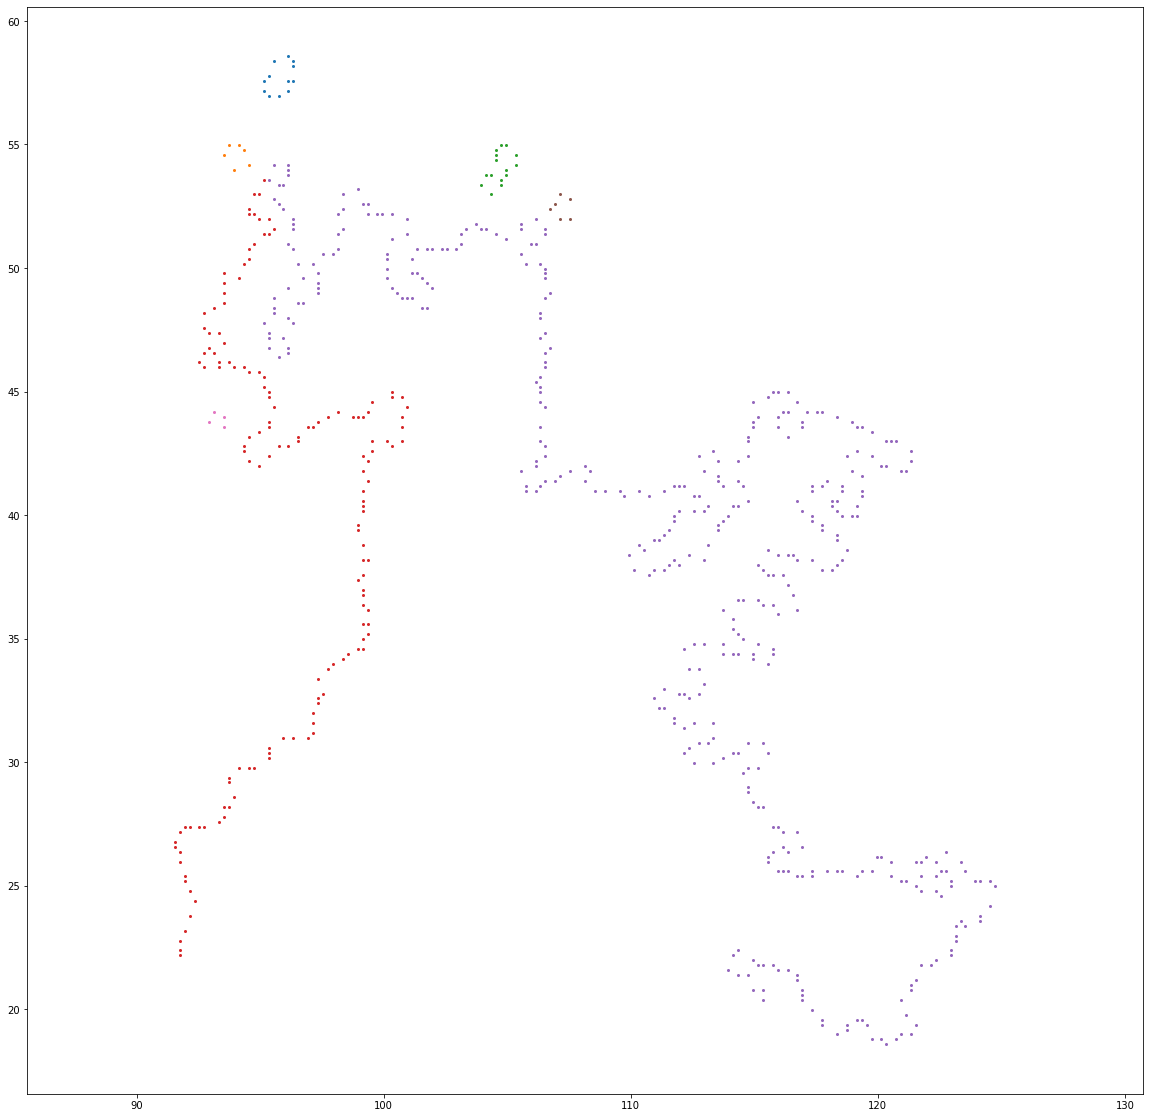

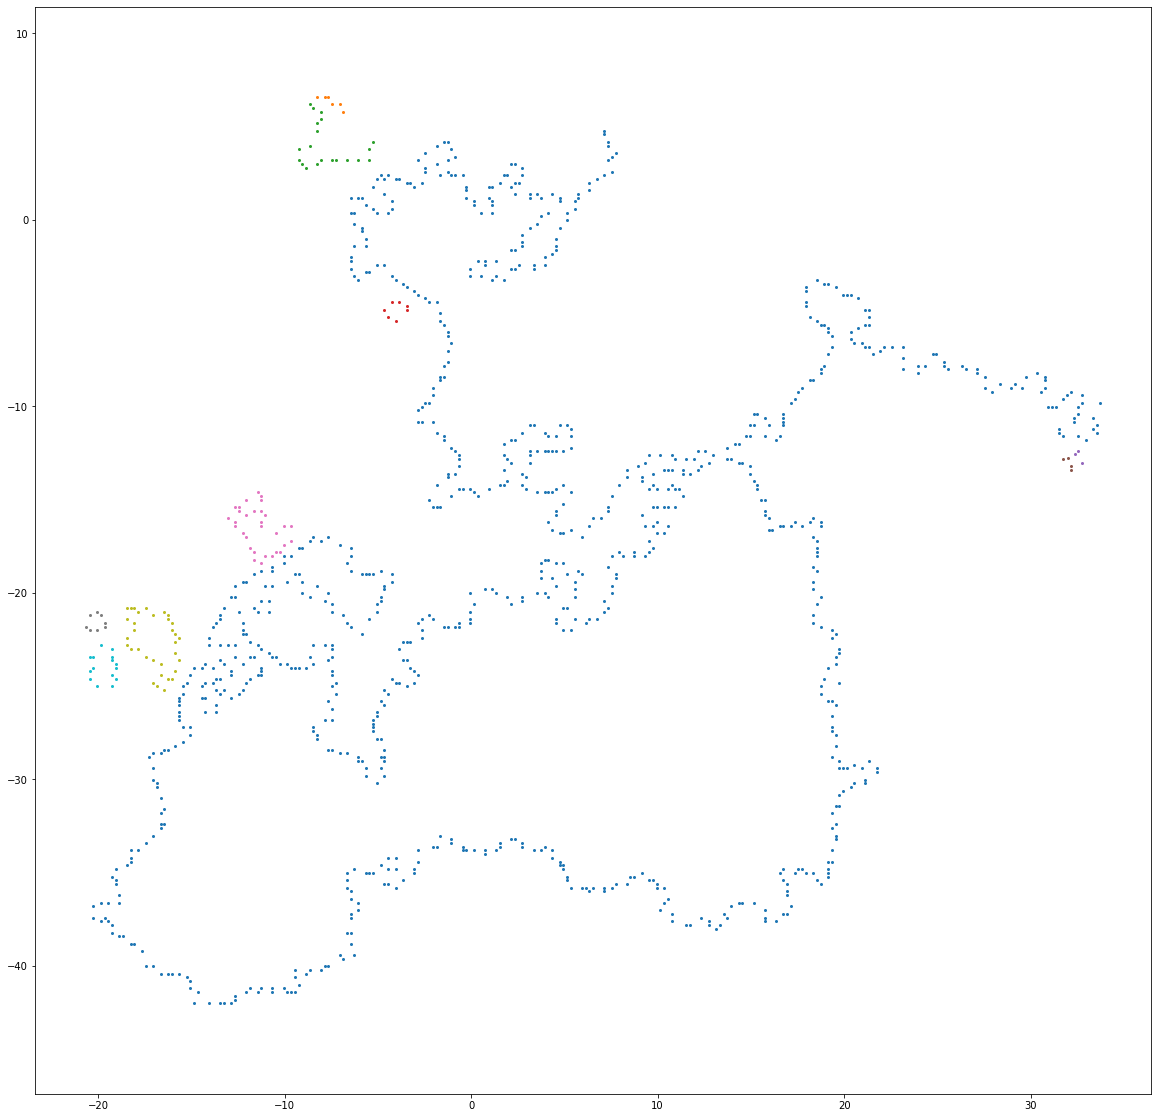

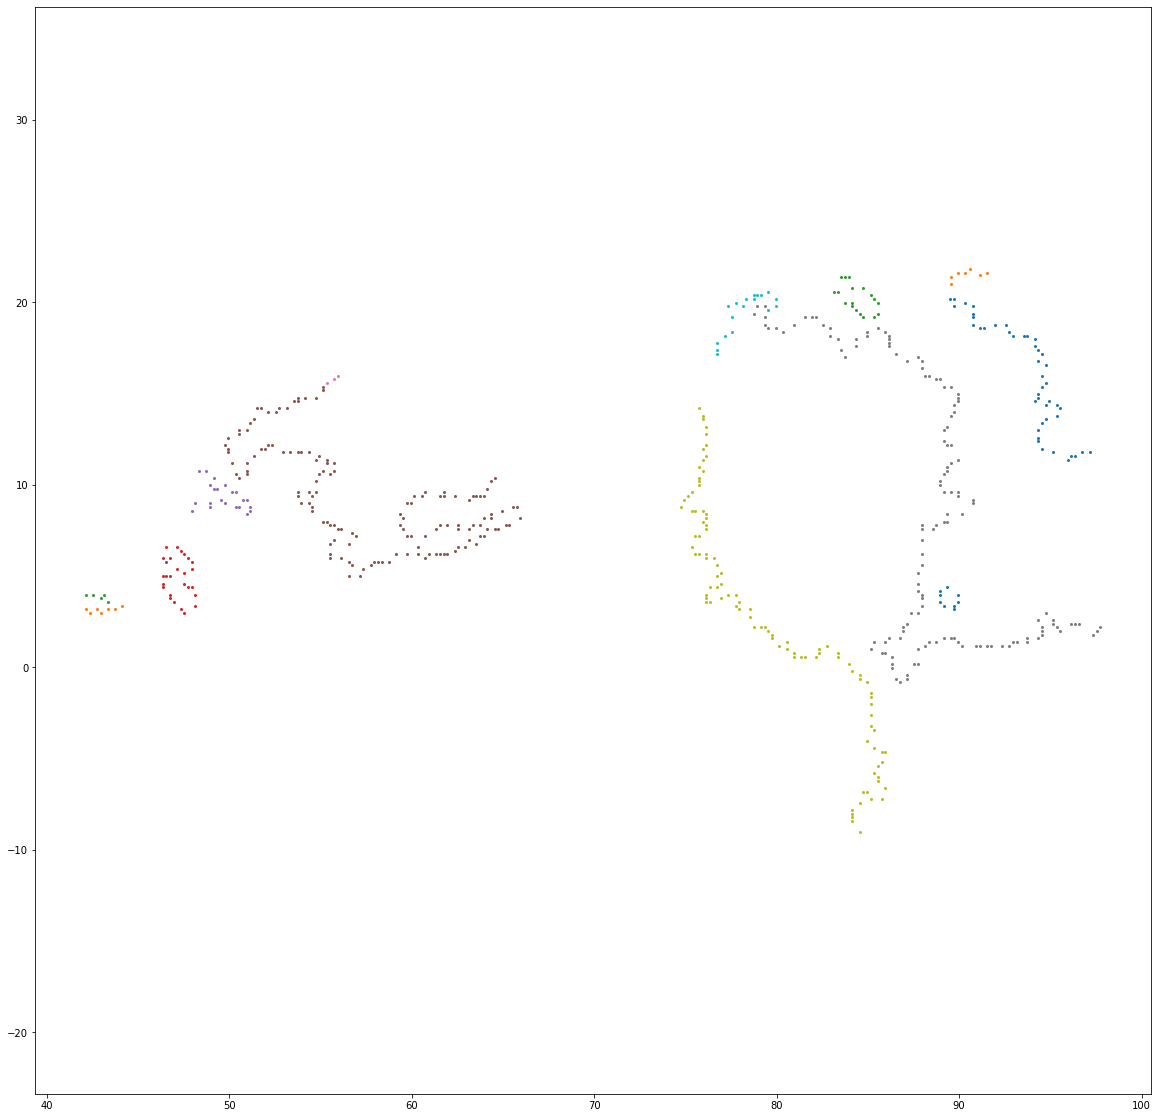

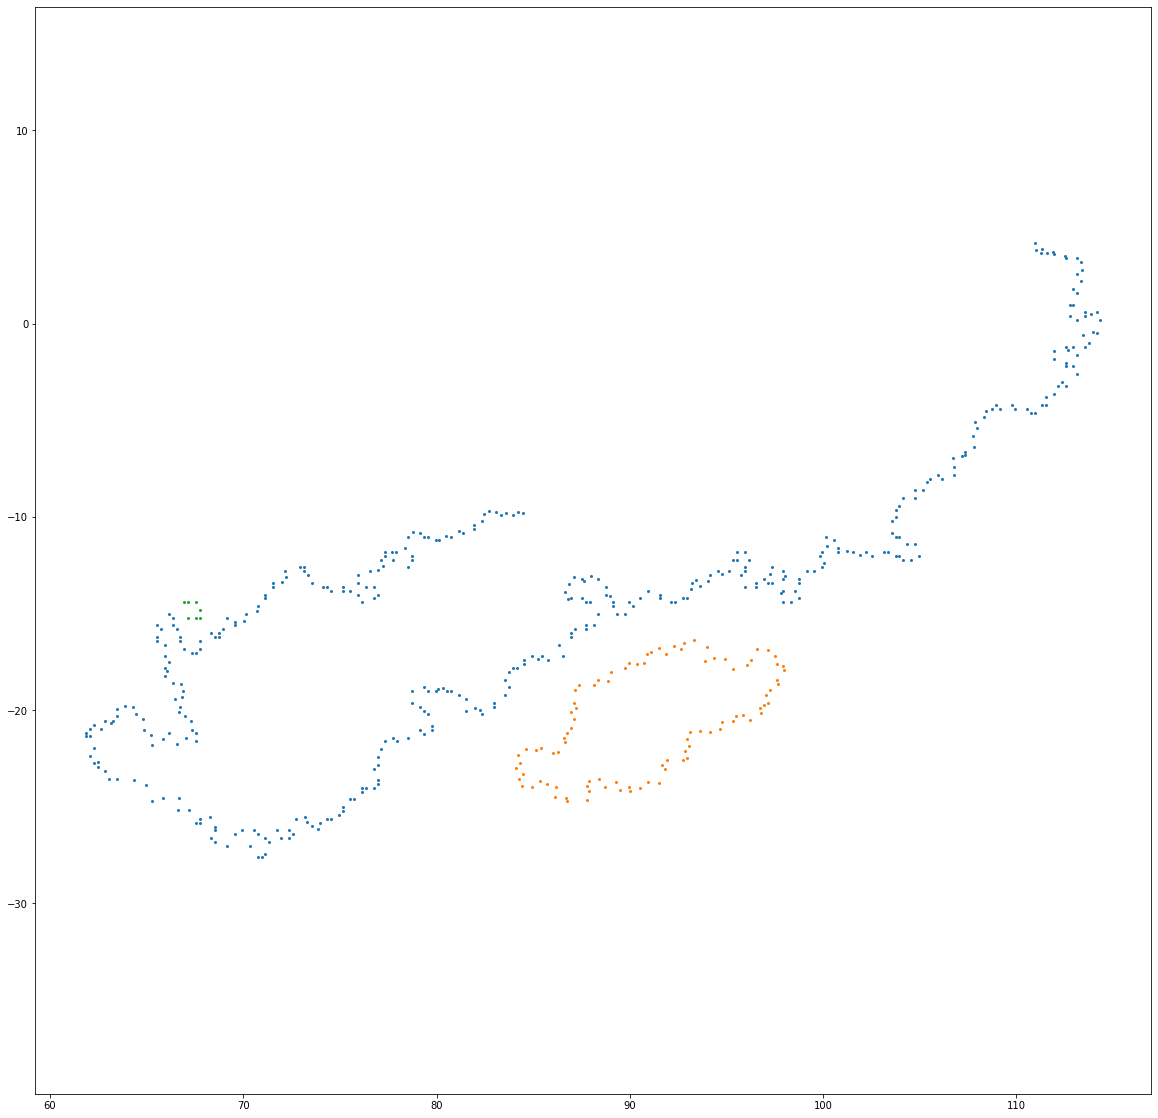

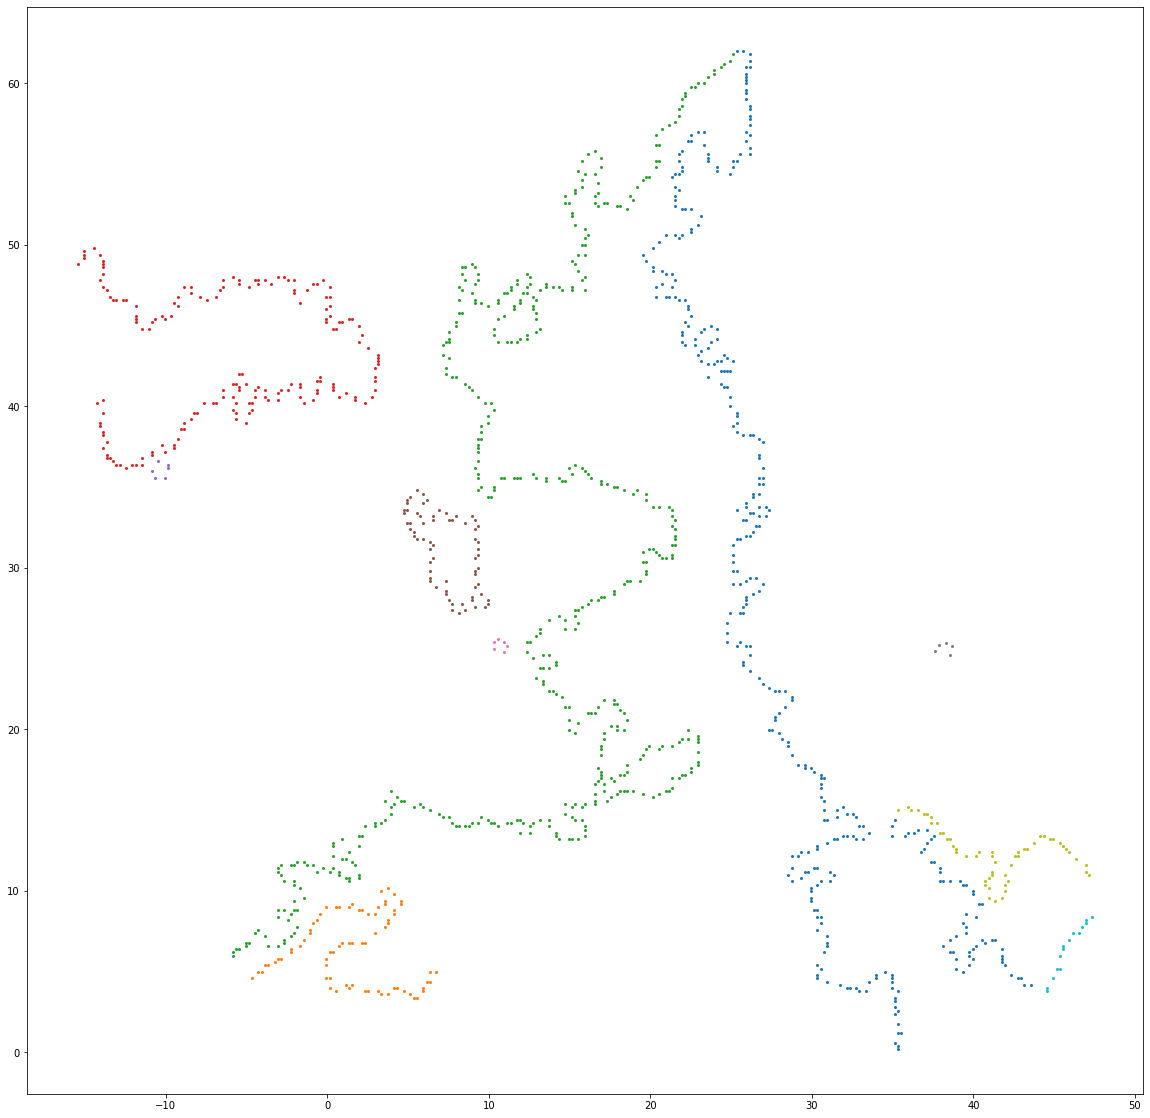

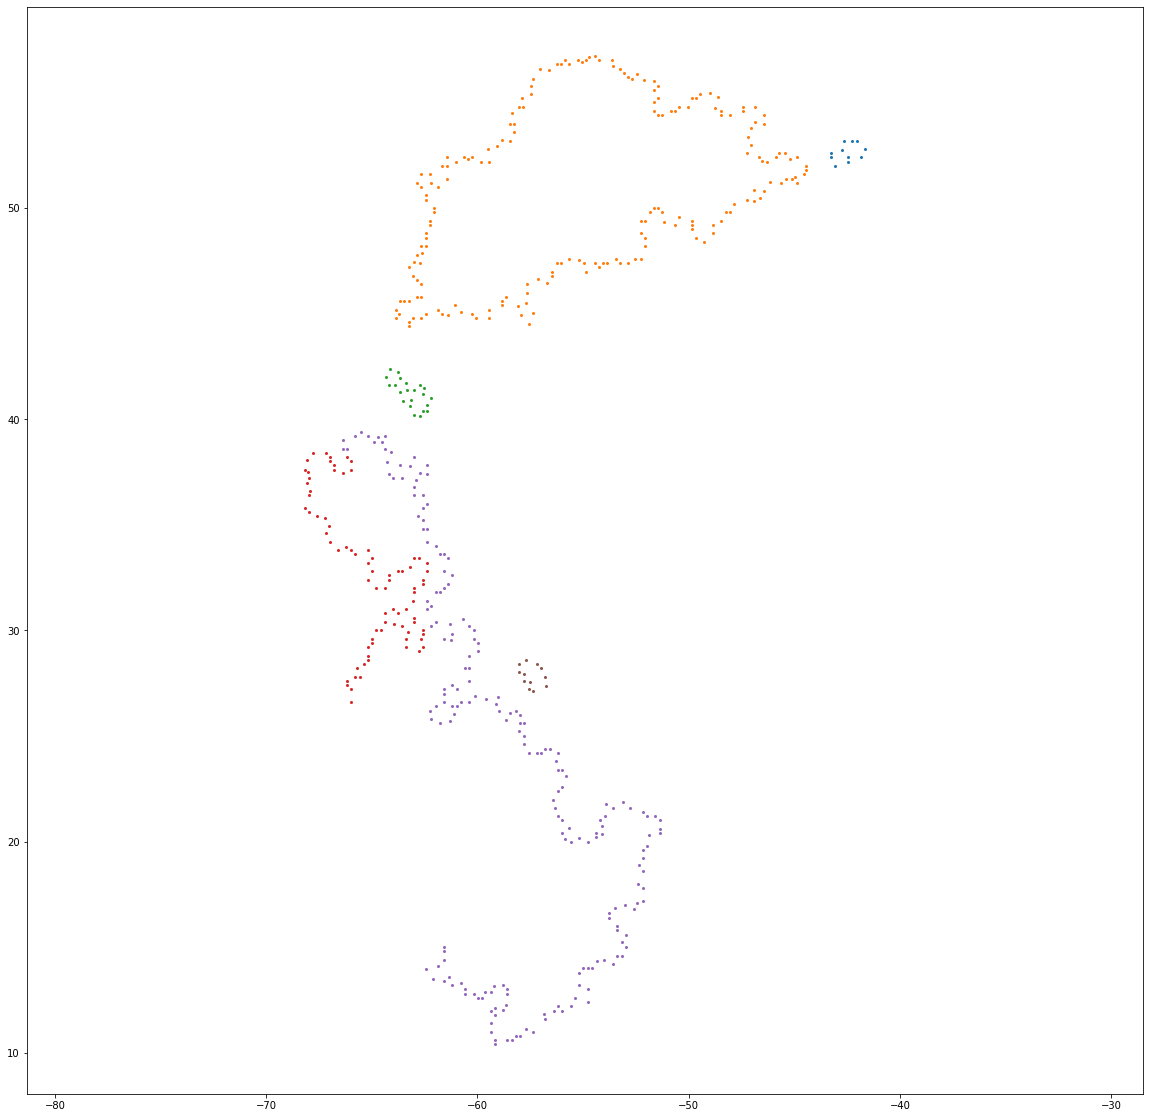

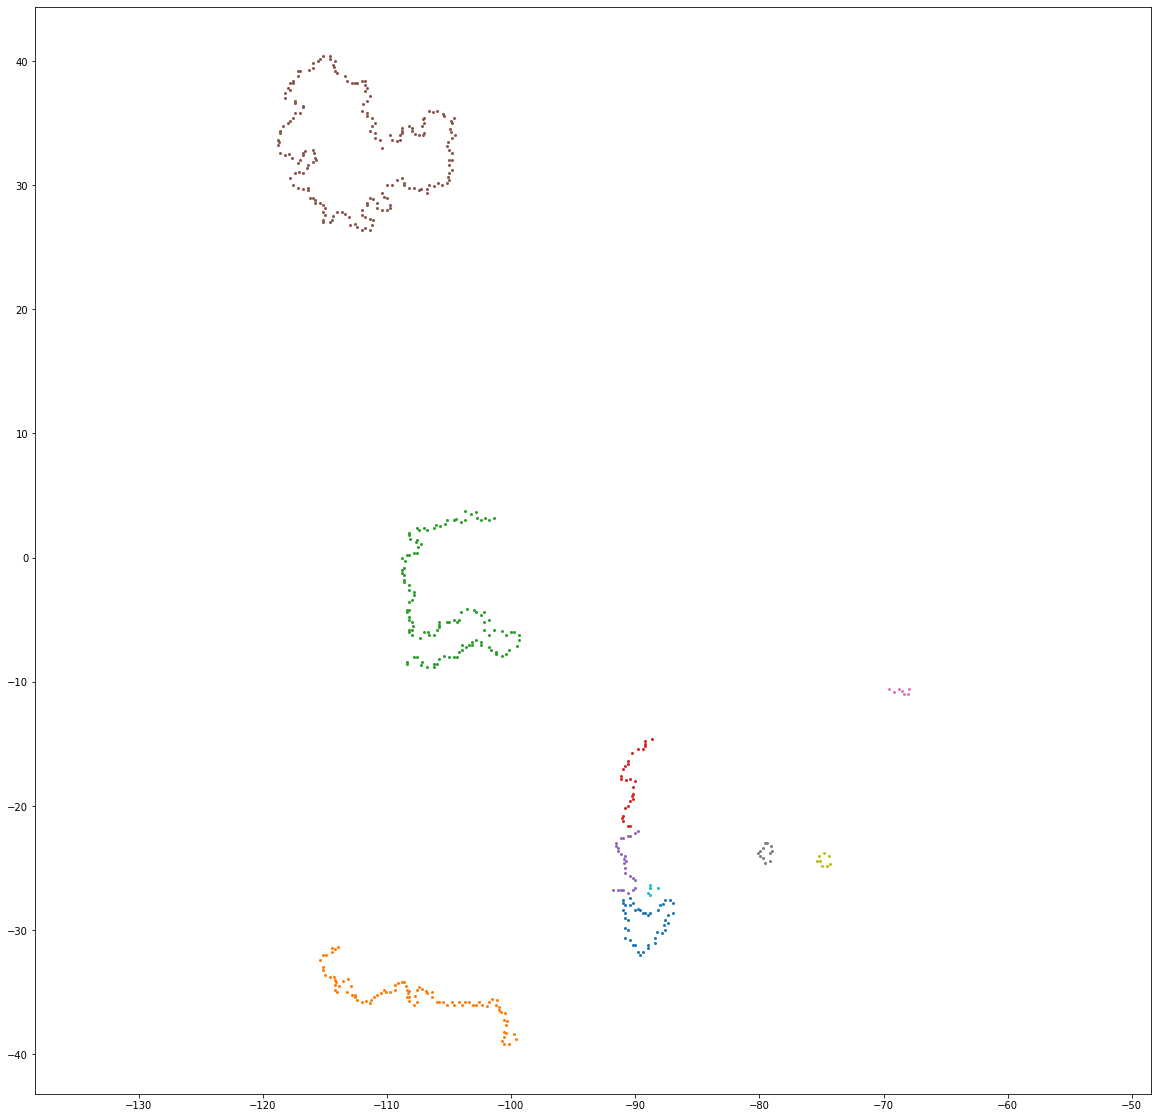

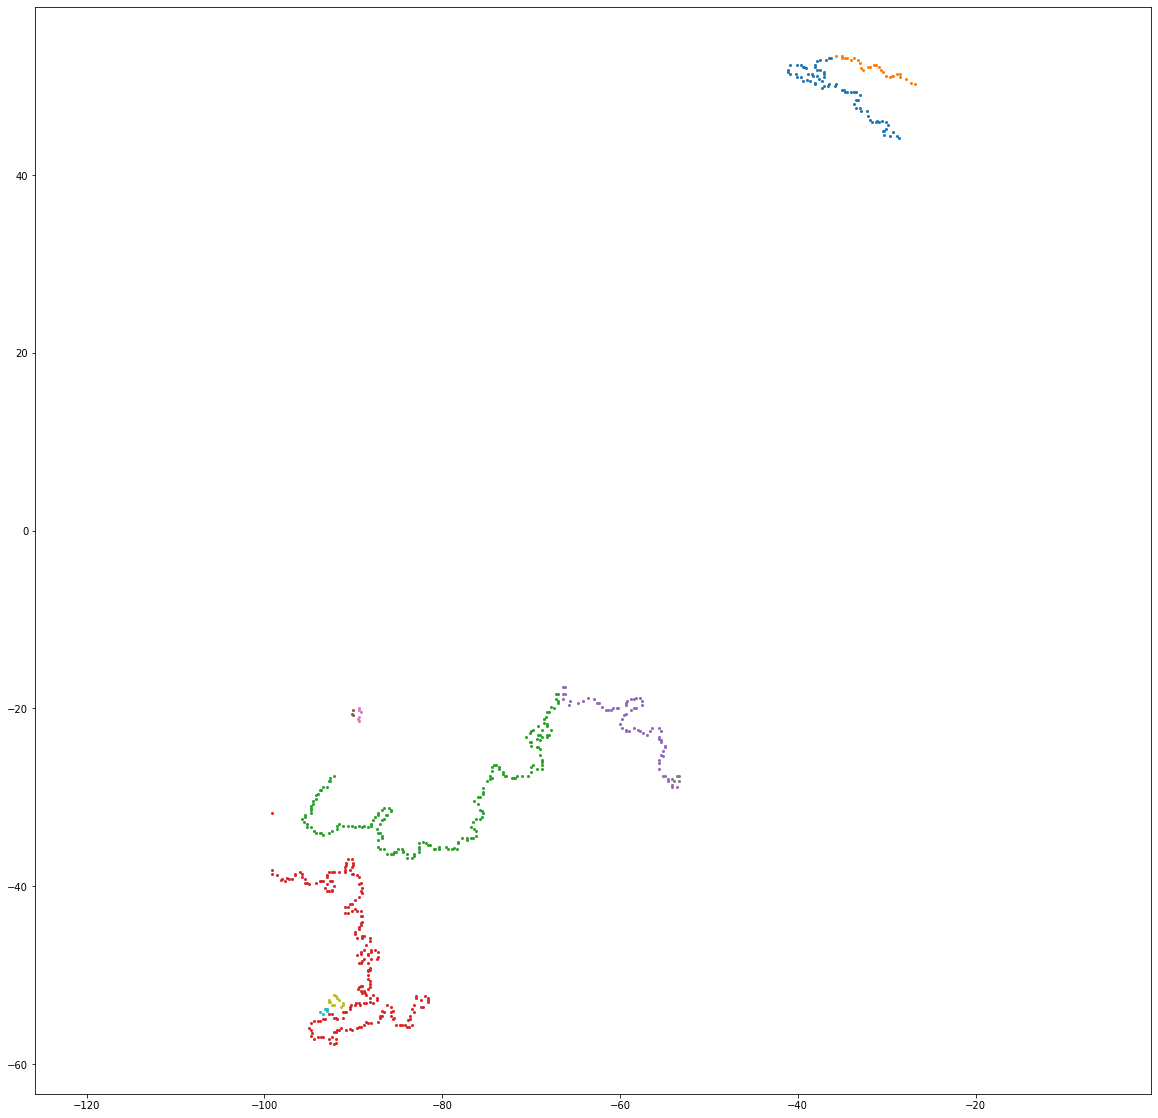

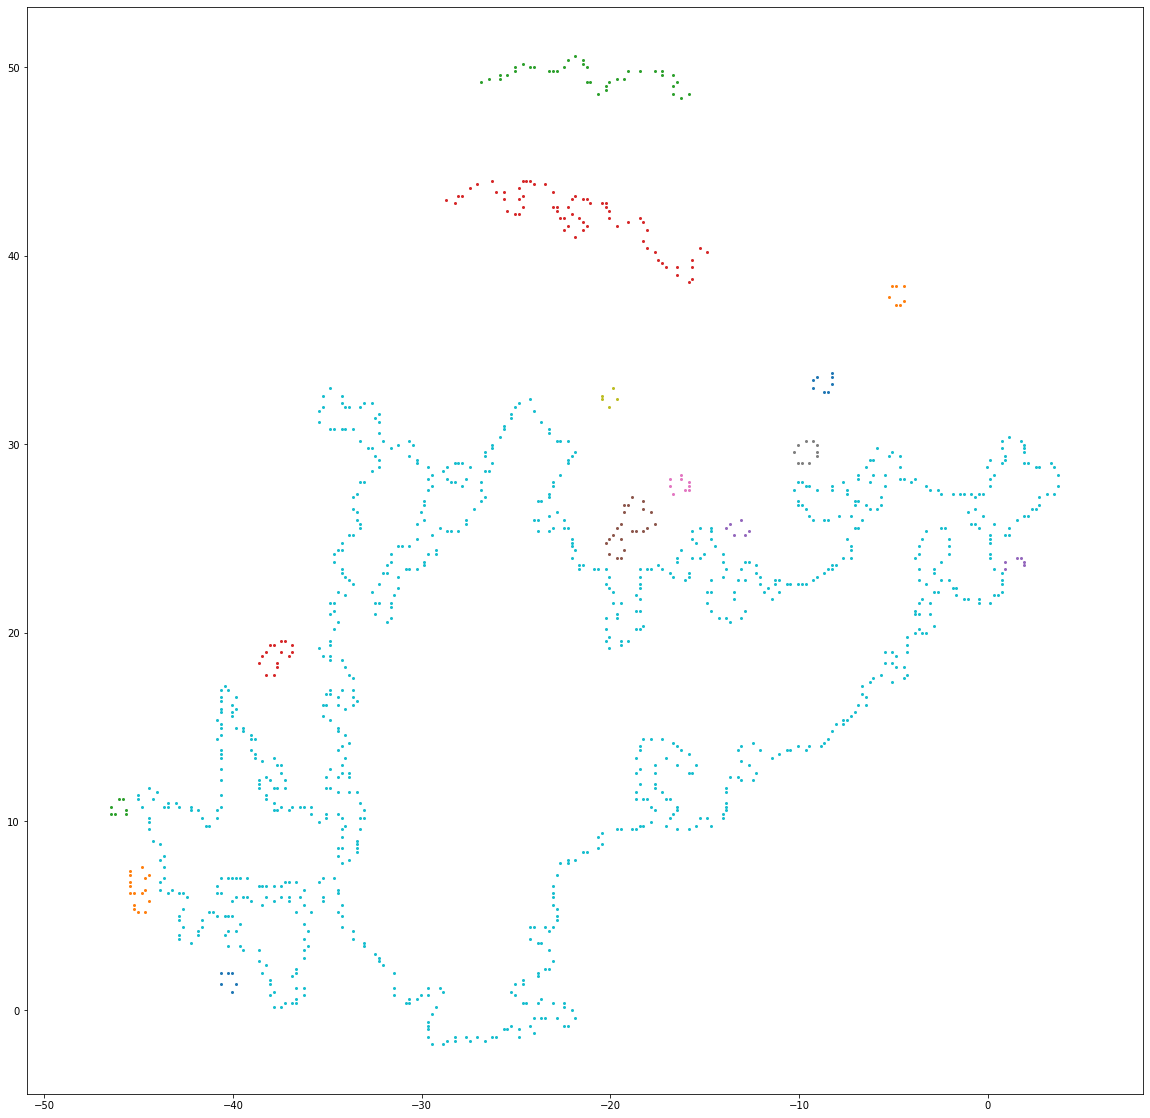

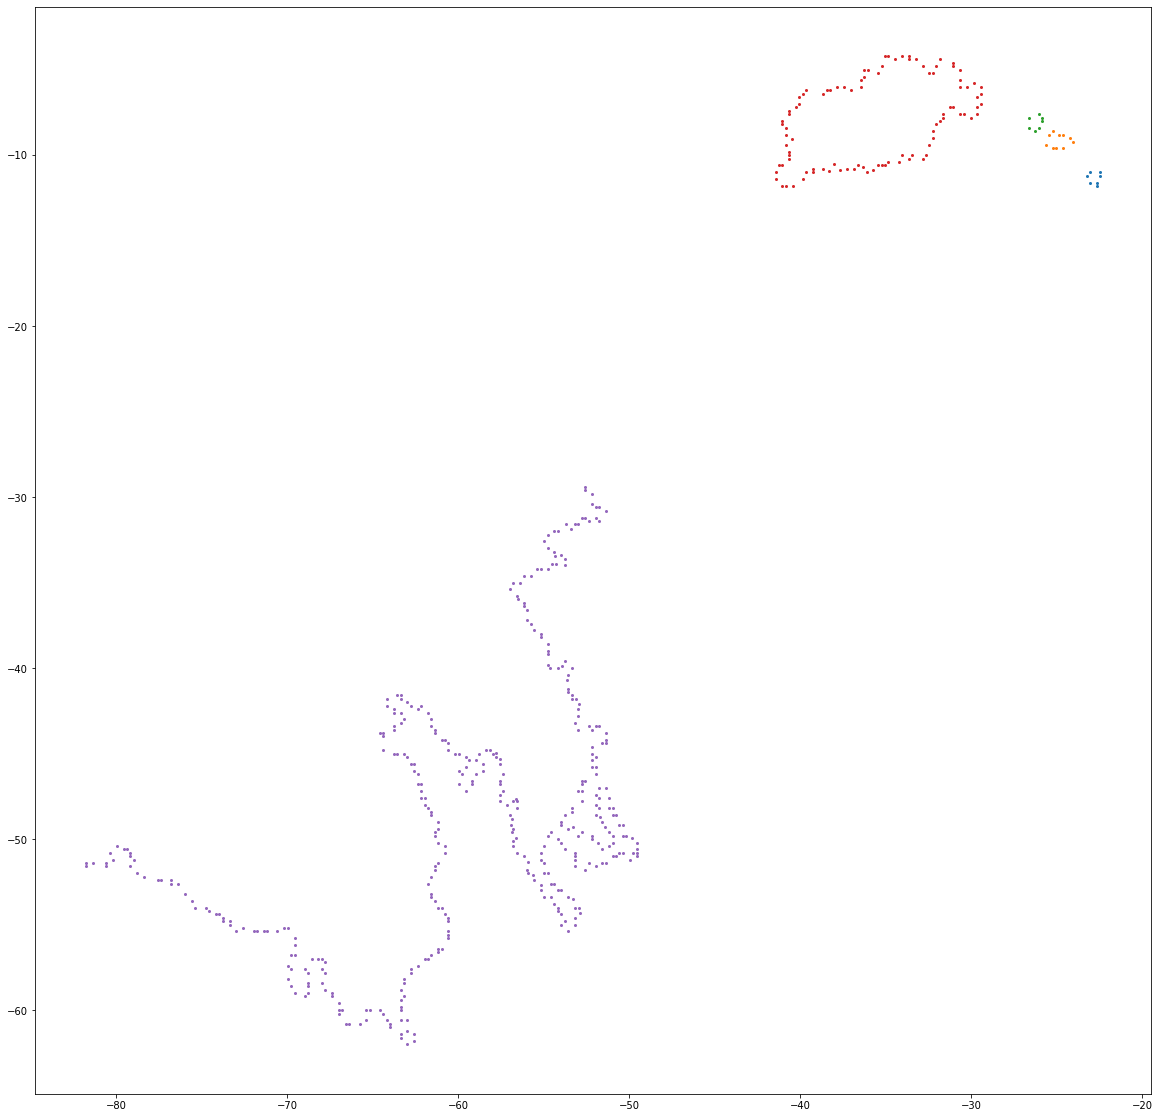

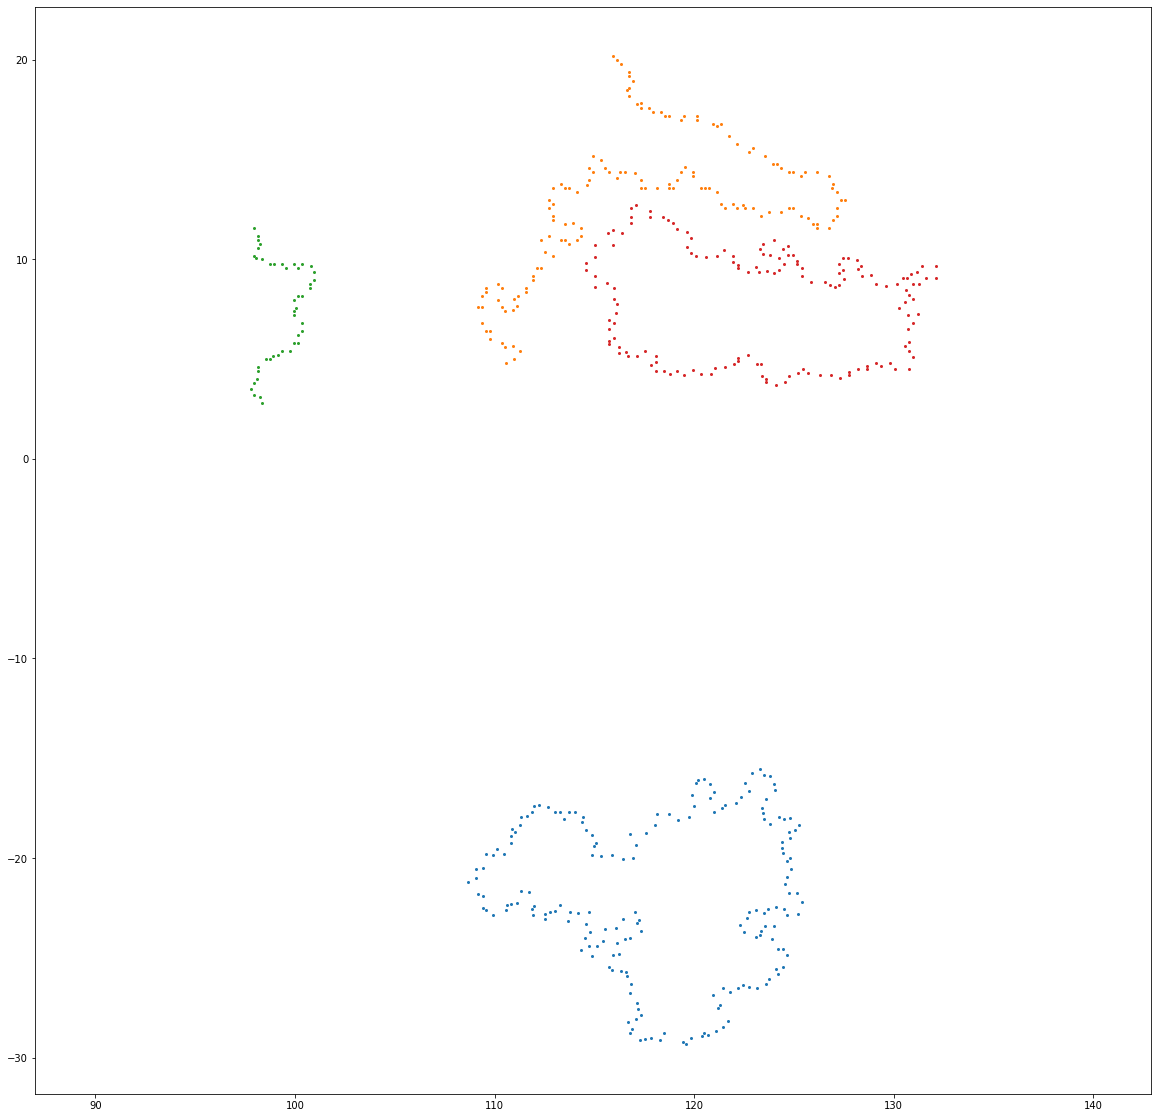

In [12]:
for coast in coasts:
    plt.figure(figsize=(20,20))
    for part in coast:
        x = np.array(part)
        plt.scatter(x[:,0], x[:,1], s=4)
    plt.axis("equal")
    plt.show()

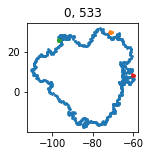

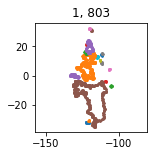

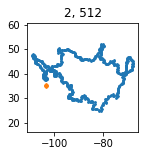

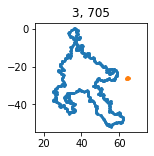

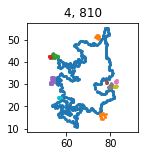

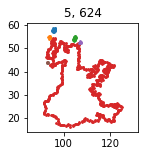

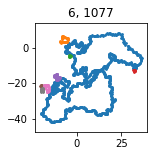

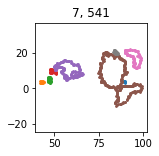

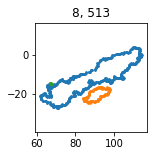

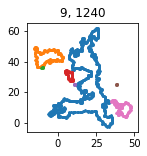

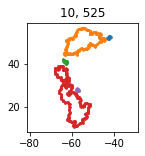

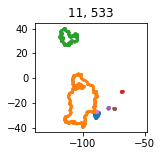

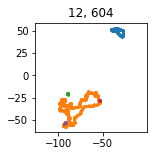

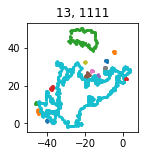

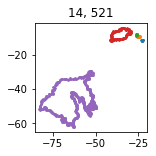

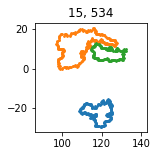

In [13]:
for idx, islands in enumerate(orders):
    plt.figure(figsize=(2,2))
    for island in islands:
        x = np.array(island)
        plt.scatter(x[:,0], x[:,1], s=3)
    
    plt.axis("equal")
    plt.title(f"{idx}, {sum([len(x) for x in coasts[idx]])}")
    plt.show()

In [14]:
allco = []
for islands in orders:
    for coordinates in islands:
        for coordinate in coordinates:
            allco.append(coordinate)
allco = np.array(allco)
print(min(allco[:,0]))
print(min(allco[:,1]))
print(max(allco[:,0]))
print(max(allco[:,1]))

-132.98
-61.99964199999997
132.0965999999997
61.98


In [15]:
np.save("orders",orders)
np.save("coasts",coasts)

/home/raph/.local/share/virtualenvs/voxel_realms-eLBrrQyR/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [18]:
import json
with open("/data/projects/voxel_realms/resources/database.json", "r") as file:
    resources = json.load(file)
resources

{'1': {'name': 'Stolsli',
  'description': 'Your journey awaits...',
  'image': 'https://gateway.pinata.cloud/ipfs/QmVVwp7oeuD9f5FvCY5C3jo863m2LTzsZecY8NXwvxukUd',
  'attributes': [{'trait_type': 'Regions', 'value': 6},
   {'trait_type': 'Cities', 'value': 8},
   {'trait_type': 'Harbors', 'value': 17},
   {'trait_type': 'Rivers', 'value': 26},
   {'trait_type': 'Resource', 'value': 'Stone'},
   {'trait_type': 'Resource', 'value': 'Coal'},
   {'trait_type': 'Order', 'value': 'The Order of Giants'}]},
 '2': {'name': 'Ilgzhijajilg',
  'description': 'Your journey awaits...',
  'image': 'https://gateway.pinata.cloud/ipfs/QmZ4AwMtFBTRAsmkggQJ5GHnhvxguGvoc1DQ85PtWEeez9',
  'attributes': [{'trait_type': 'Regions', 'value': 4},
   {'trait_type': 'Cities', 'value': 21},
   {'trait_type': 'Harbors', 'value': 15},
   {'trait_type': 'Rivers', 'value': 36},
   {'trait_type': 'Resource', 'value': 'Coal'},
   {'trait_type': 'Order', 'value': 'The Order of Perfection'}]},
 '3': {'name': 'Hetokamohuti'

In [21]:
import glob
paths = glob.glob("/data/projects/voxel_realms/output/directions/*.direction")
directions = {}
for path in paths:
    path = path.replace("/data/projects/voxel_realms/output/directions/","").replace(".direction","")
    realm_number, direction = path.split("_")
    realm_number = int(realm_number)
    direction = float(direction)
    directions[realm_number] = direction

In [22]:
orders = {}
for realm_idx, realm_data in resources.items():
    order = realm_data["attributes"][-1]["value"]
    if order not in orders:
        orders[order] = [(realm_idx, directions[int(realm_idx)])]
    else:
        orders[order].append((realm_idx, directions[int(realm_idx)]))
        
orders_contour = np.load("orders.npy", allow_pickle=True)
orders_coast = np.load("coasts.npy", allow_pickle=True)

-2.601173153319209


(0.85, 4.15, 4.75, 10.25)

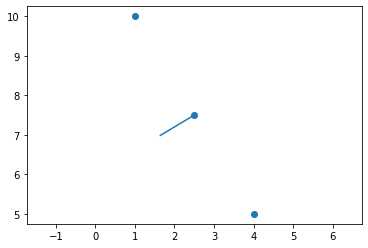

In [23]:
c1 = np.array([4,5])
c2 = np.array([1,10])
normal = np.arctan2(c2[0]-c1[0],c1[1]-c2[1])
m = (c1+c2)/2
plt.scatter([c1[0],c2[0],m[0]],[c1[1],c2[1],m[1]])
dx = np.cos(normal)
dy = np.sin(normal)
print(normal)
plt.plot([m[0],m[0]+dx],[m[1],m[1]+dy])
plt.axis("equal")

In [24]:
for coasts in orders_coast:
    print(len(coasts))

7
18
3
3
14
7
10
13
3
11
6
10
10
15
5
4


In [25]:
flip = [
    [1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 1, 1, 0, 0 , 0, 1, 1],
    [1, 1, 1],
    [0, 1, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 1],
    [1, 0, 1, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 1, 0, 1, 1], #12
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 0]
]

517
165.6491709589959


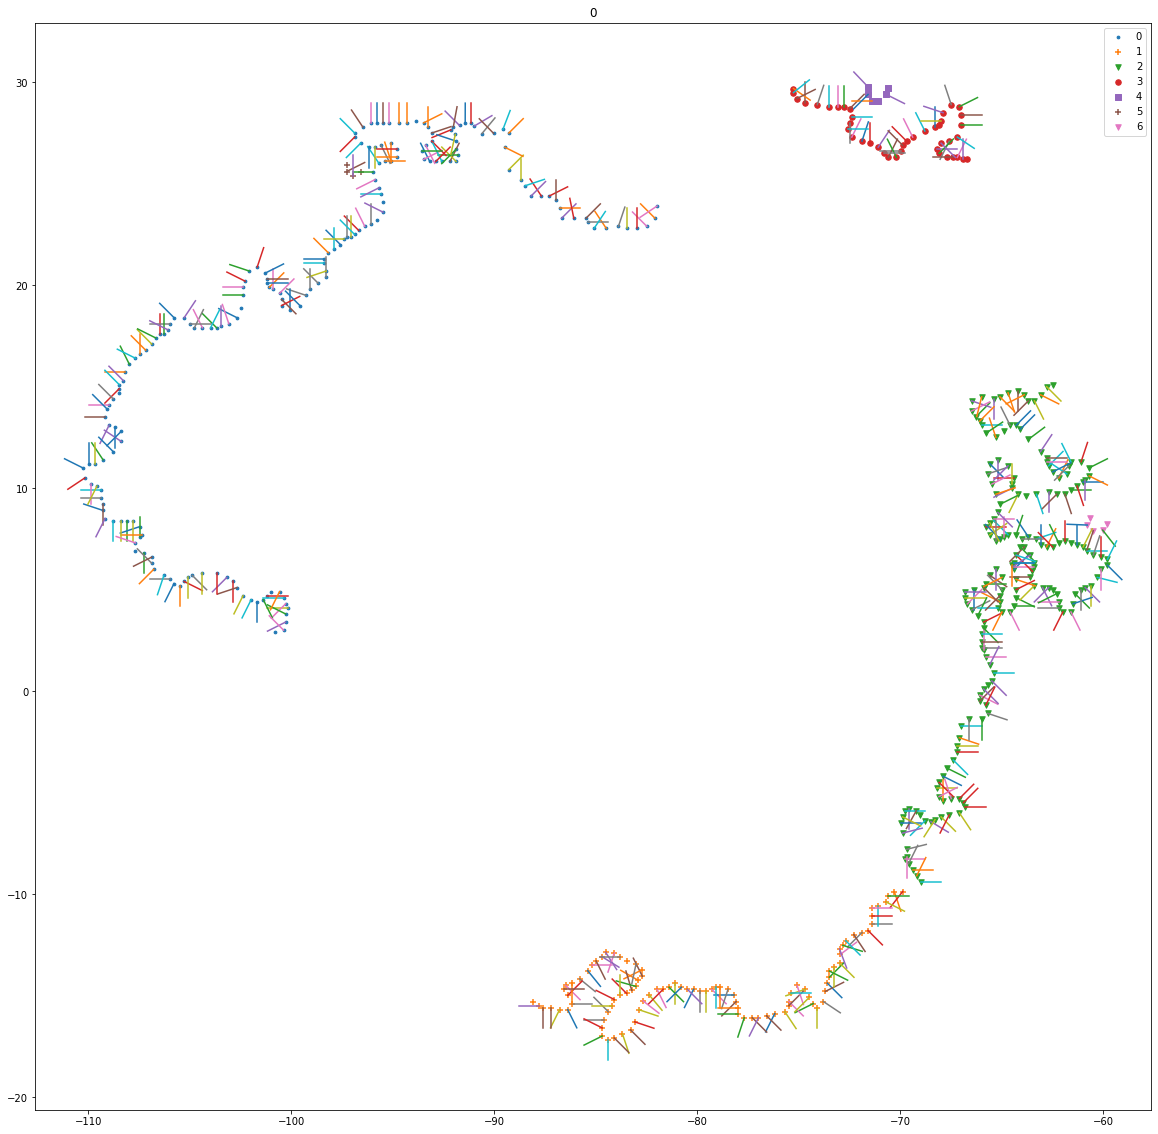

758
202.2198856162418


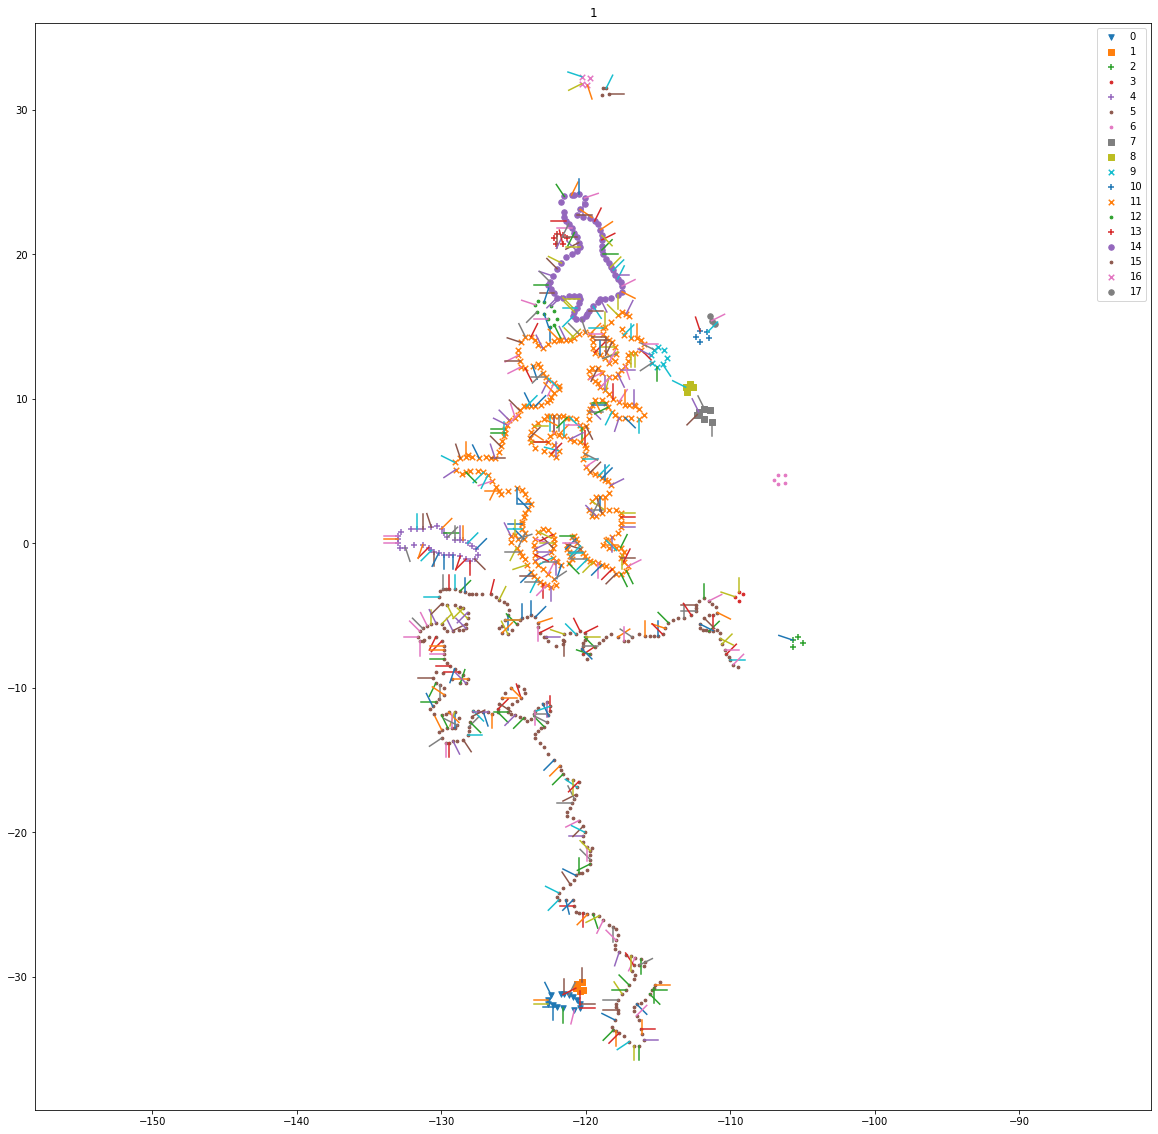

504
190.95012179720428


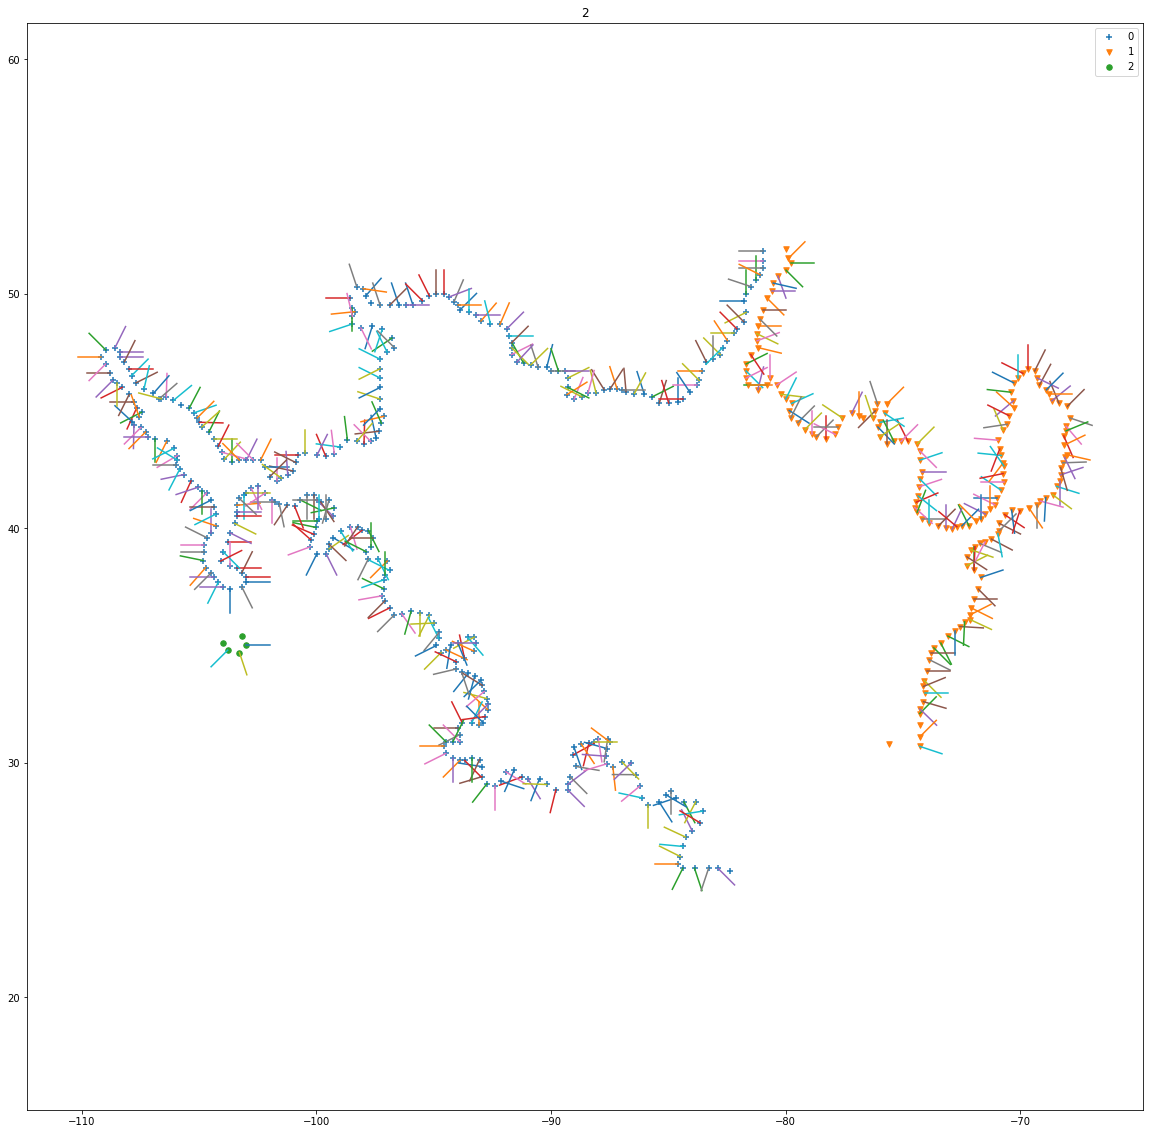

699
247.27221485554563


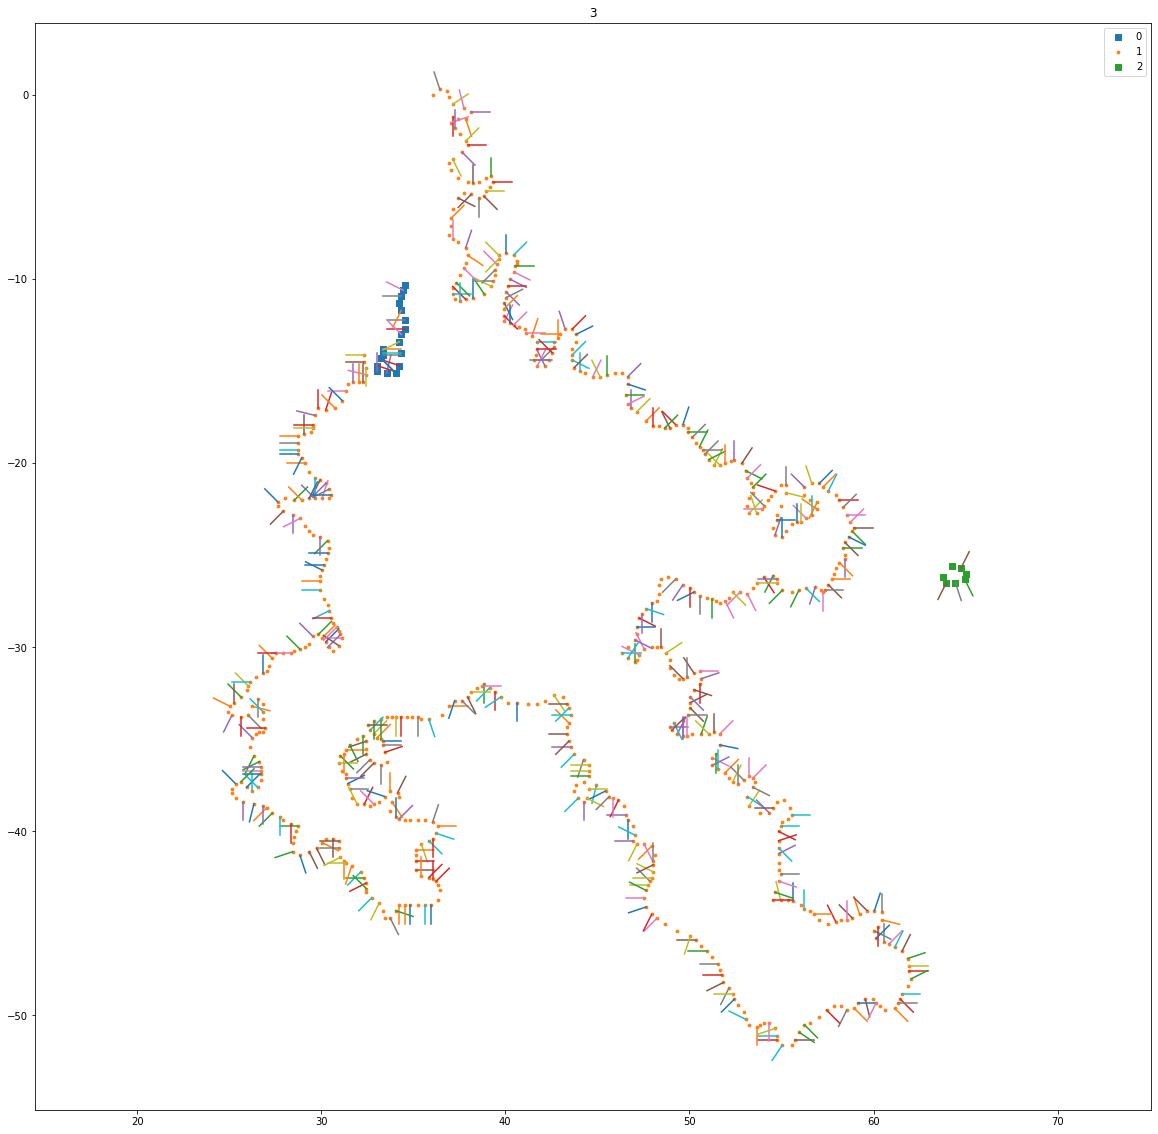

776
181.03892844526987


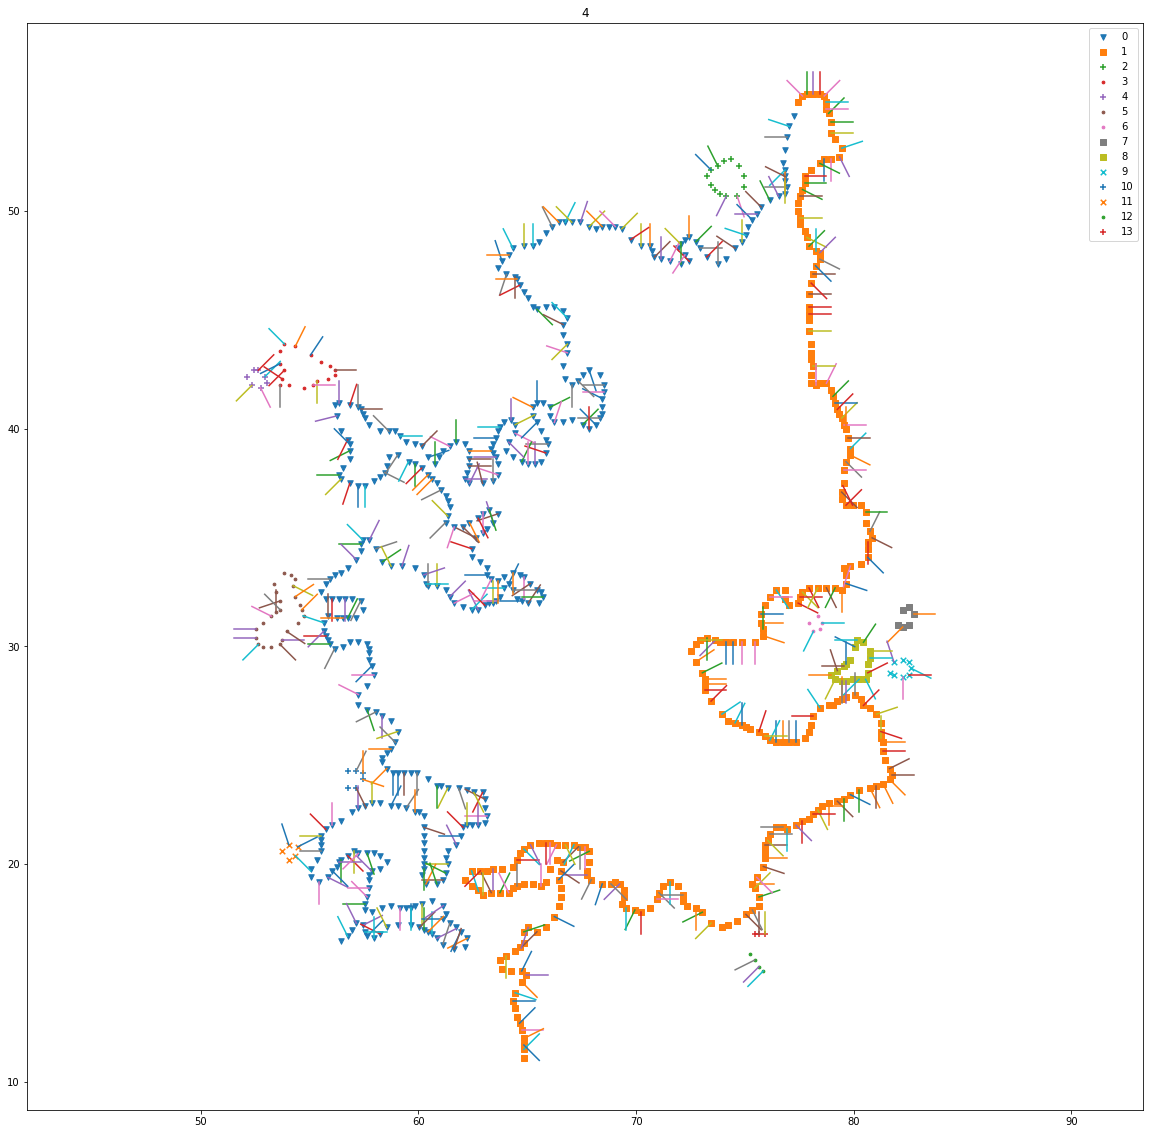

605
253.90442740149302


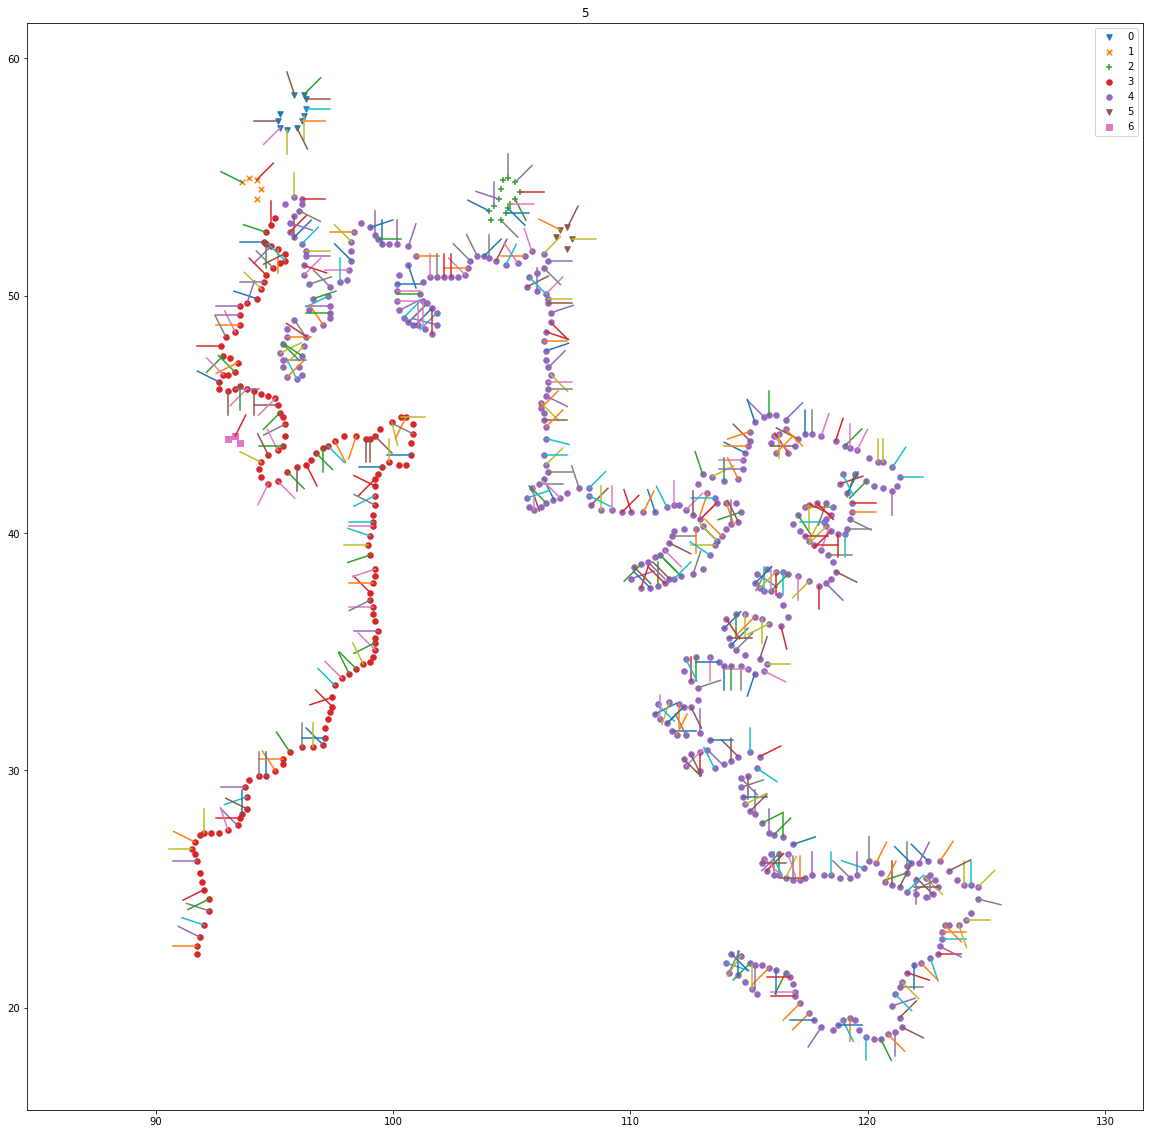

1054
120.51648836838223


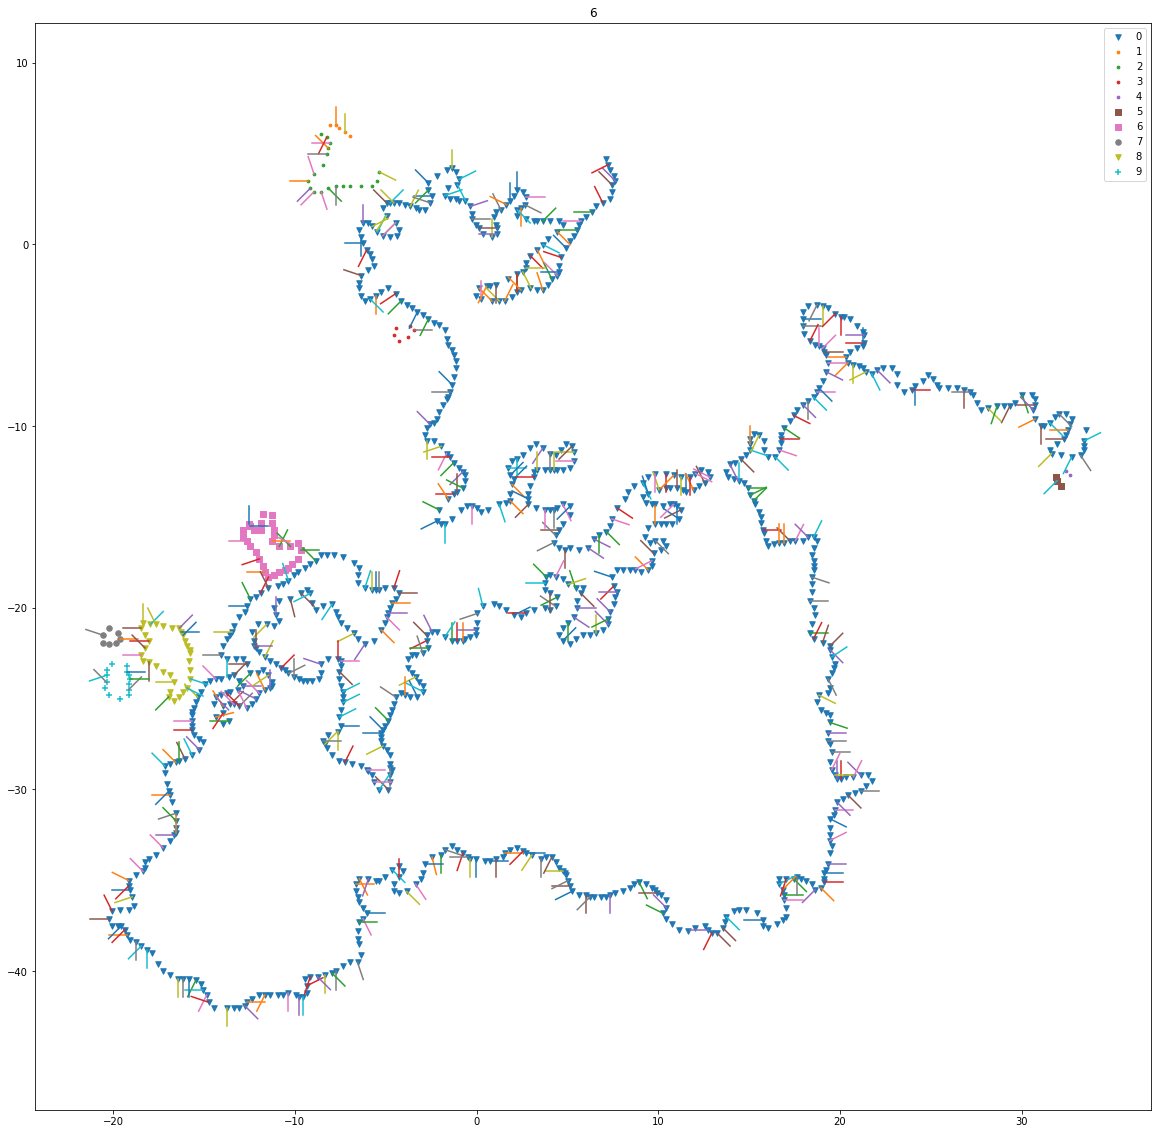

505
194.8972080213274


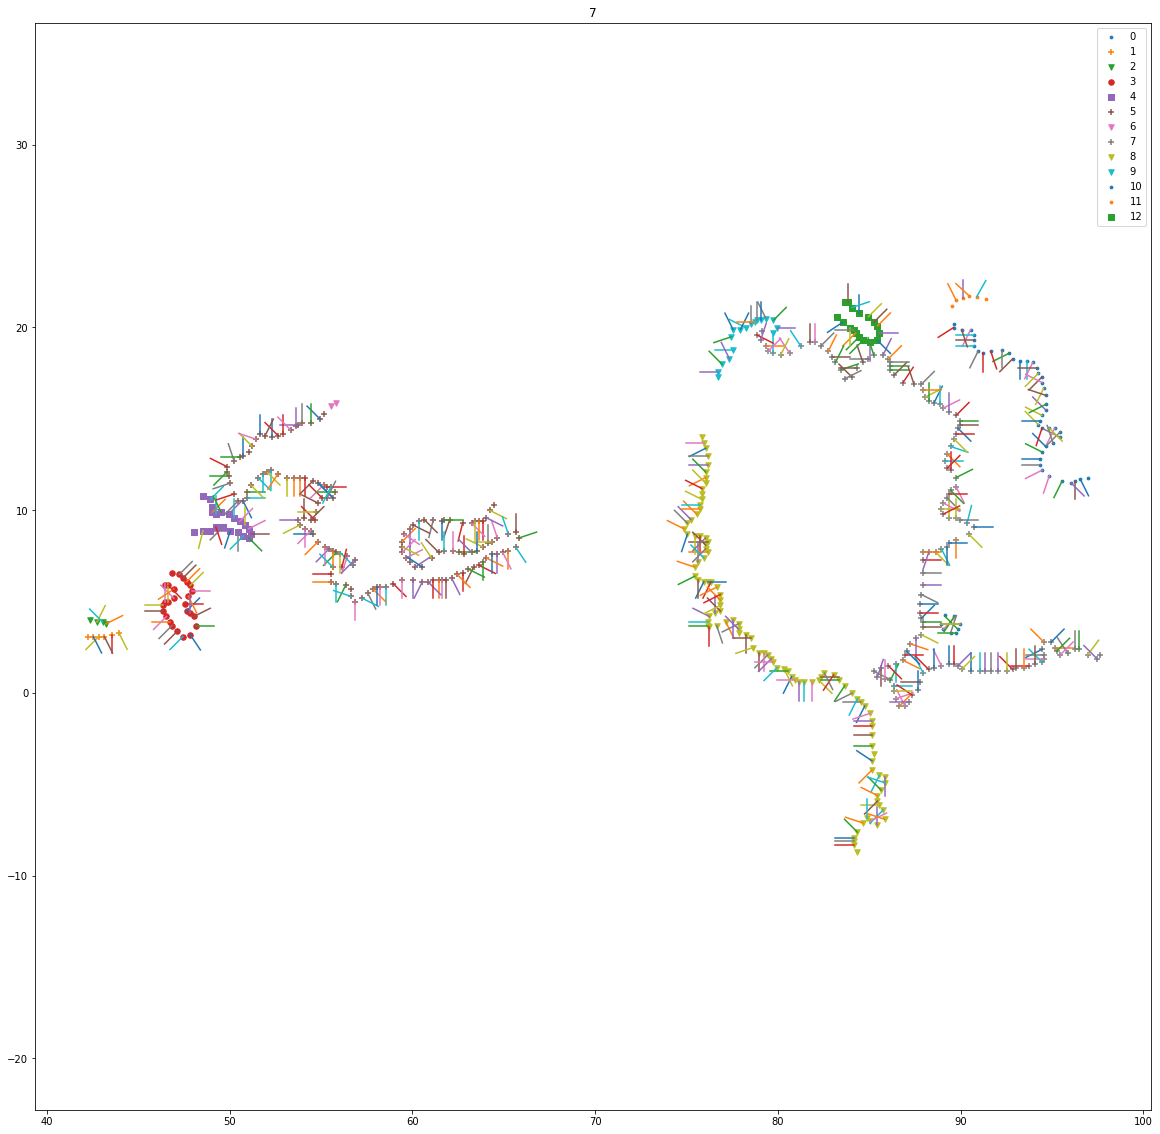

505
79.77033952967457


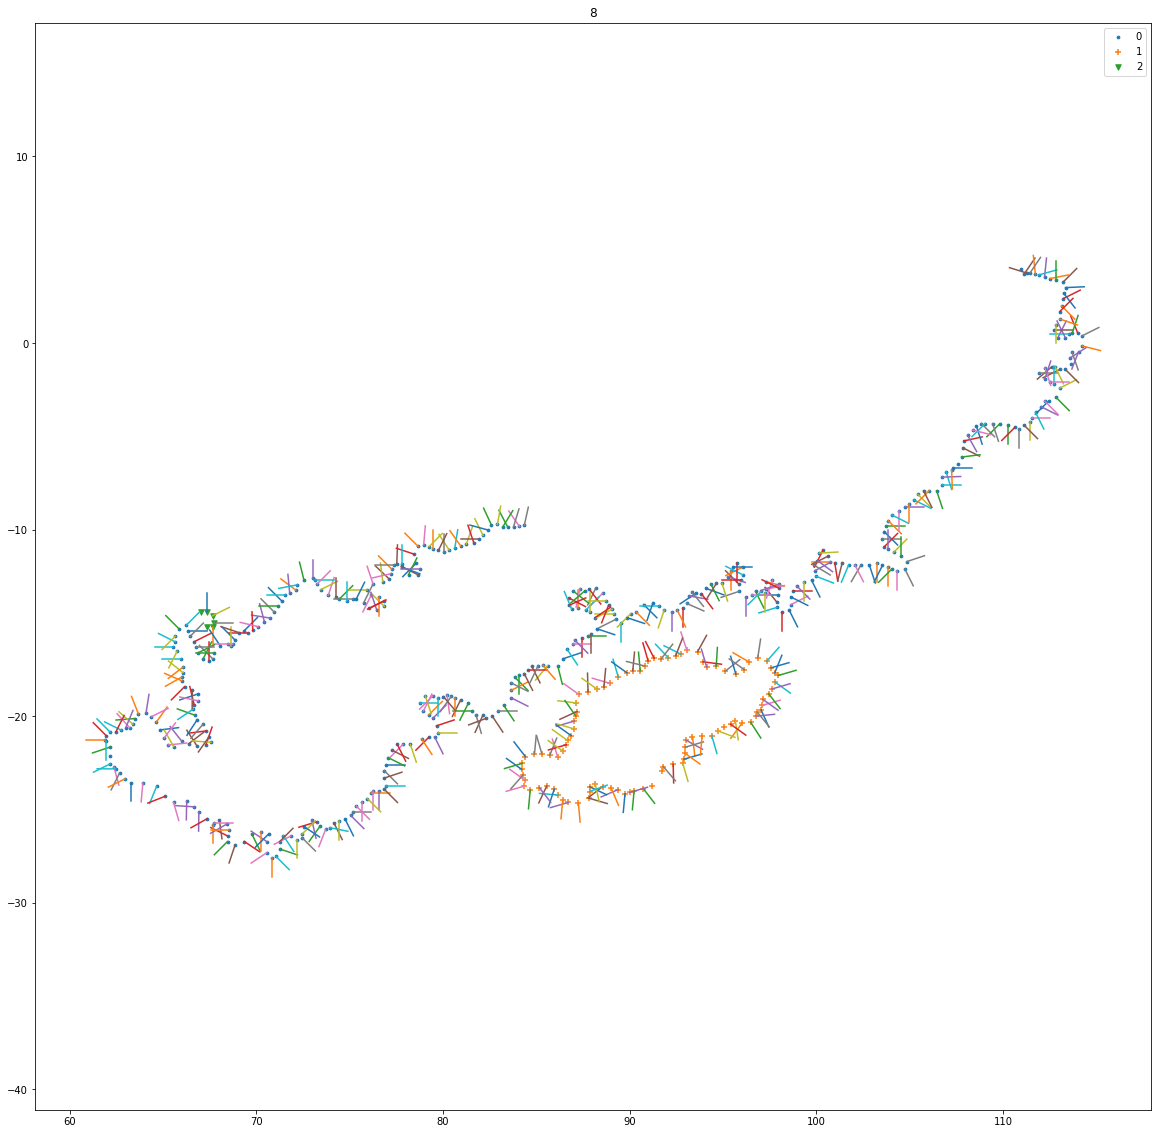

1213
306.1436217728096


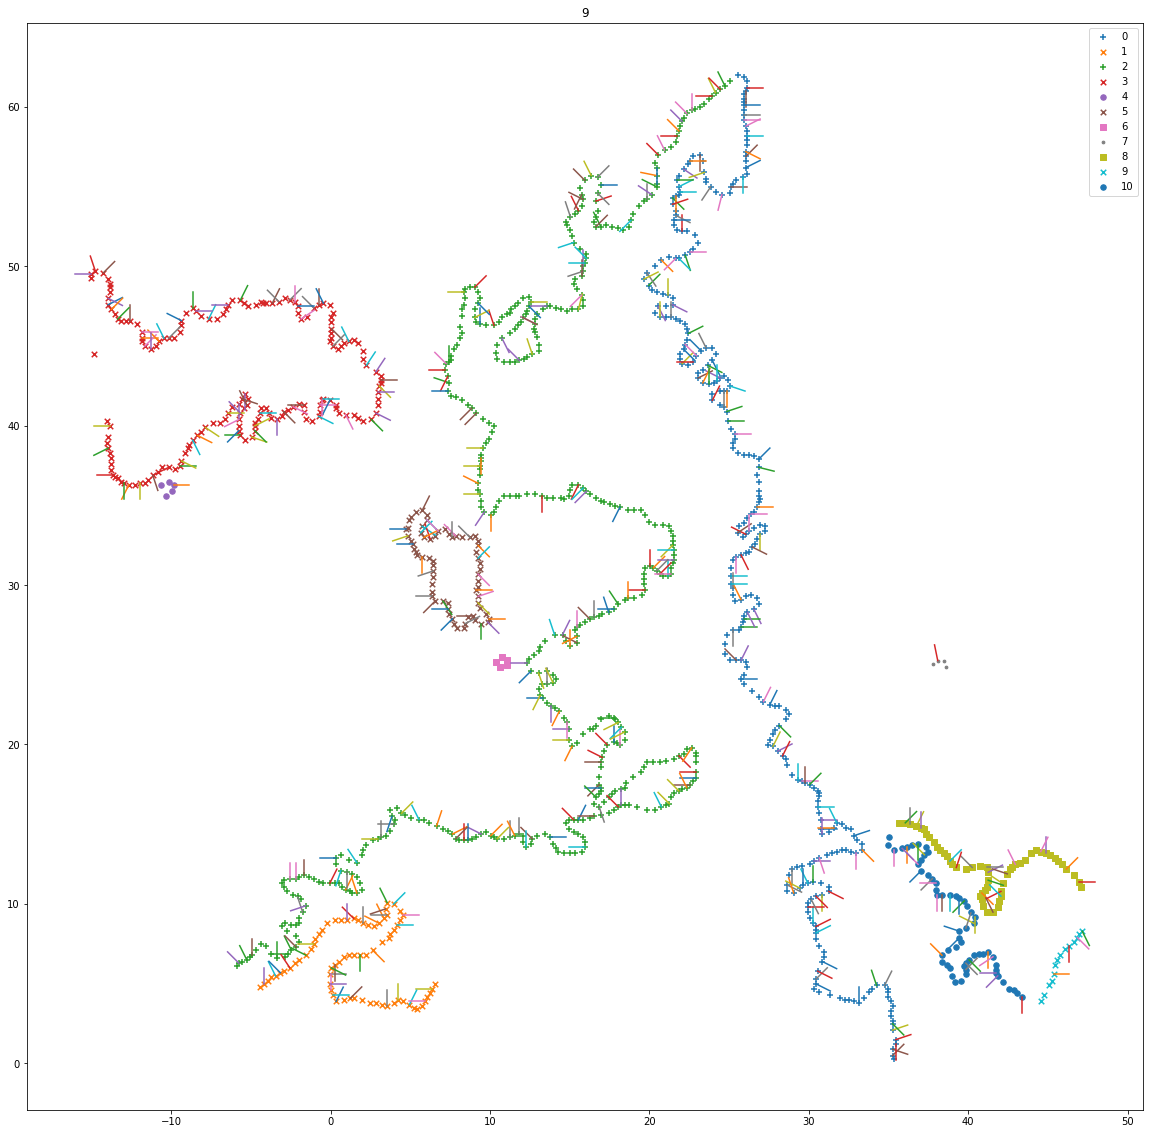

508
82.65742161991479


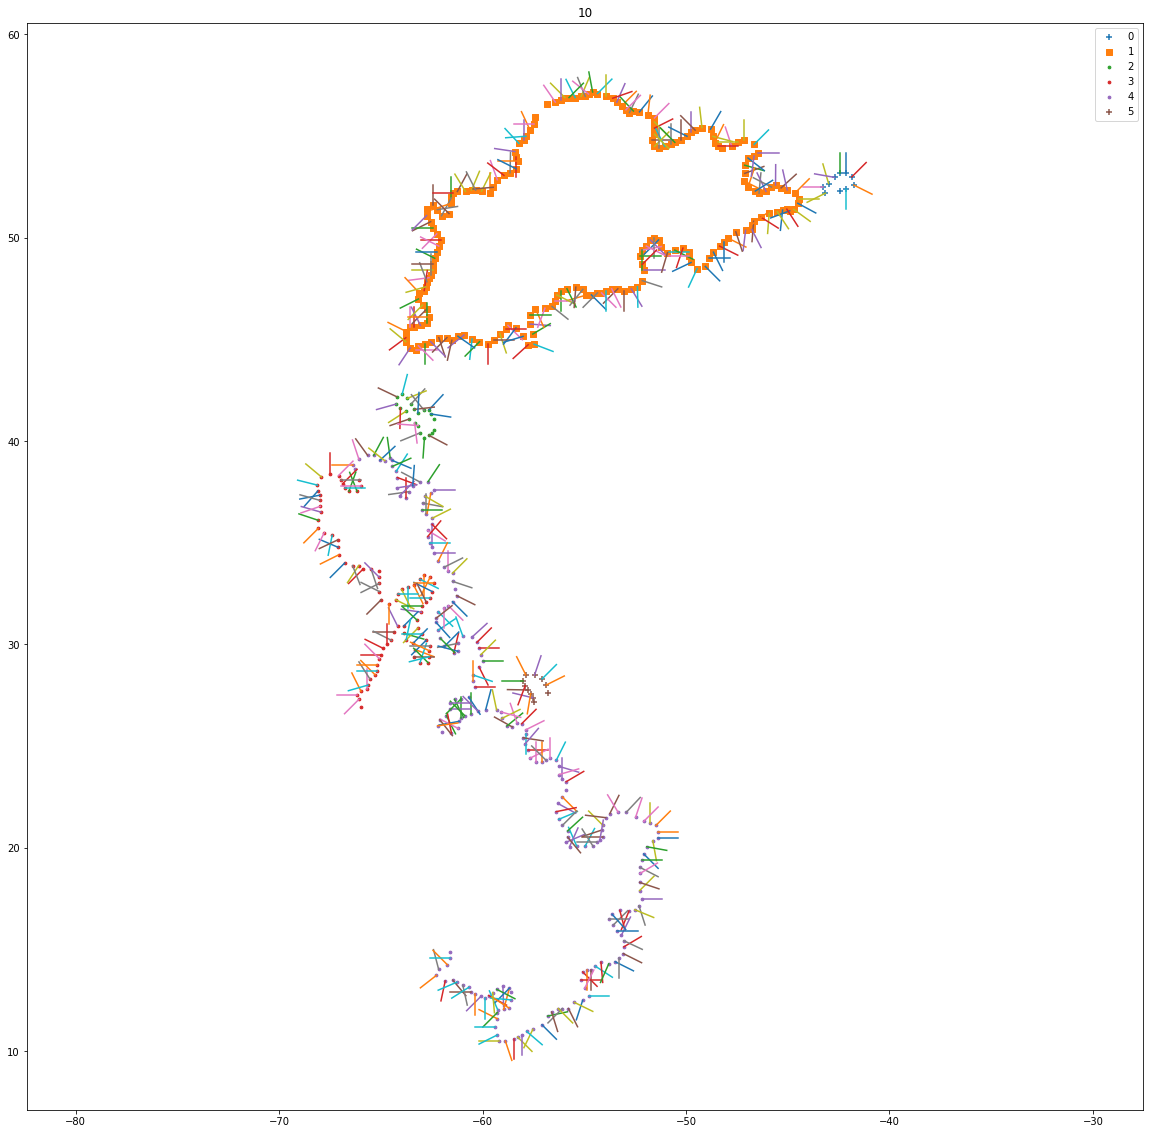

506
123.26860685542498


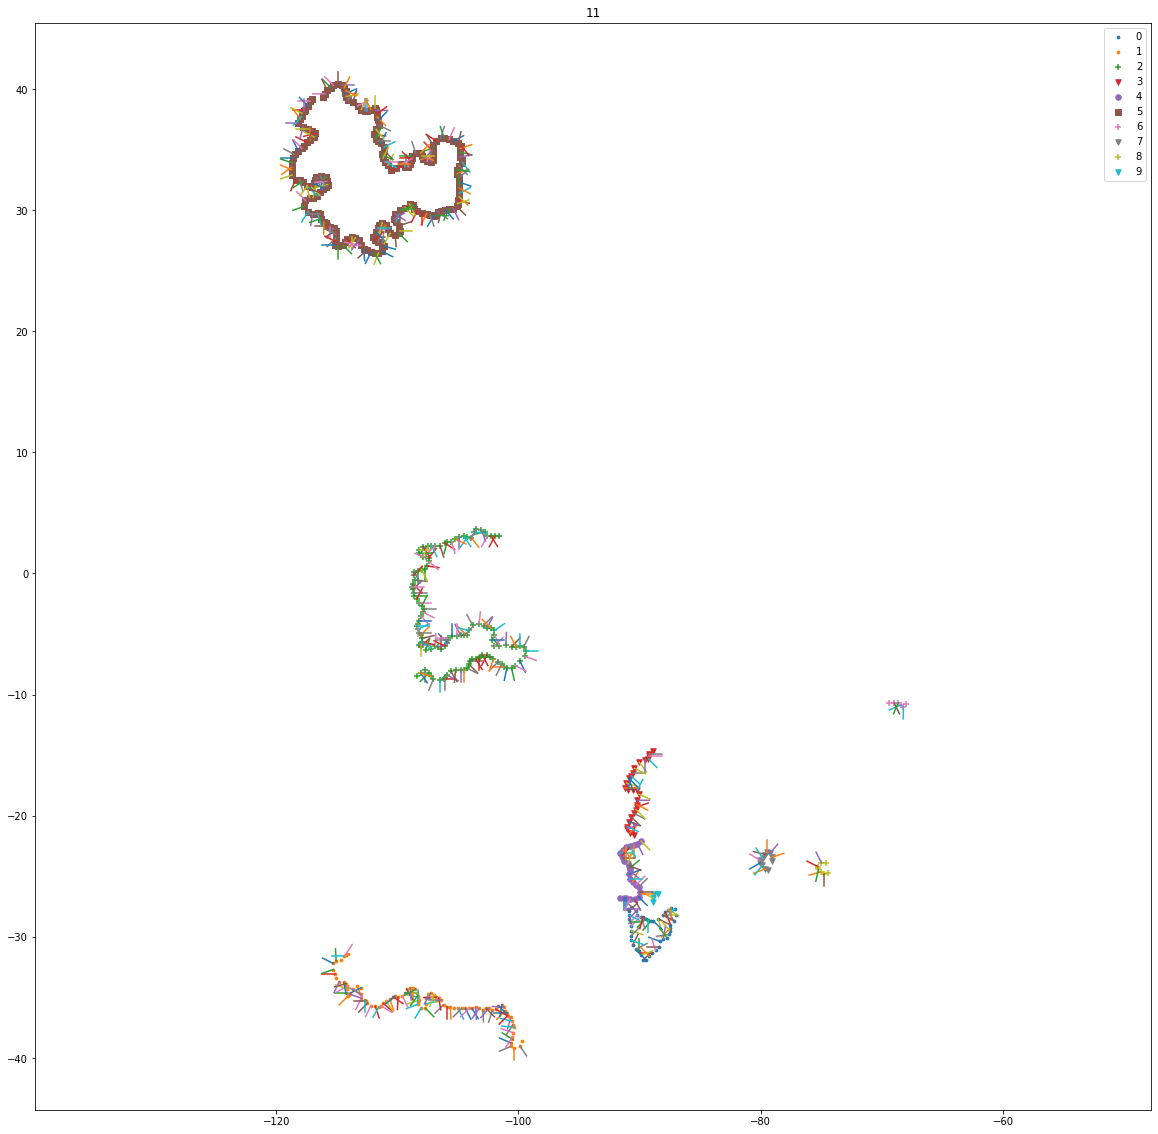

578
200.8733753473531


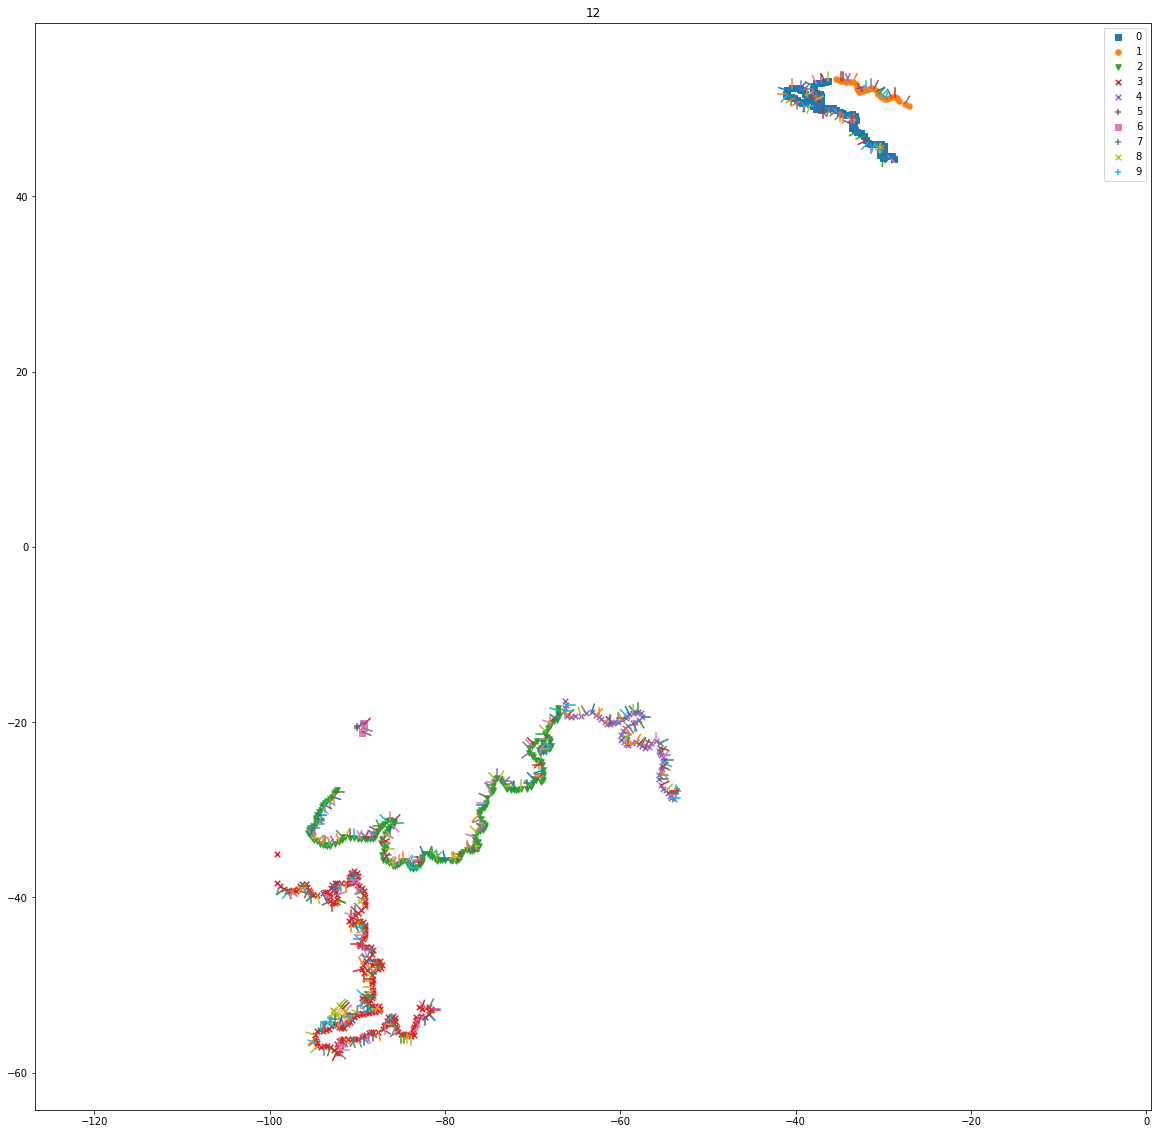

1069
170.5035944804744


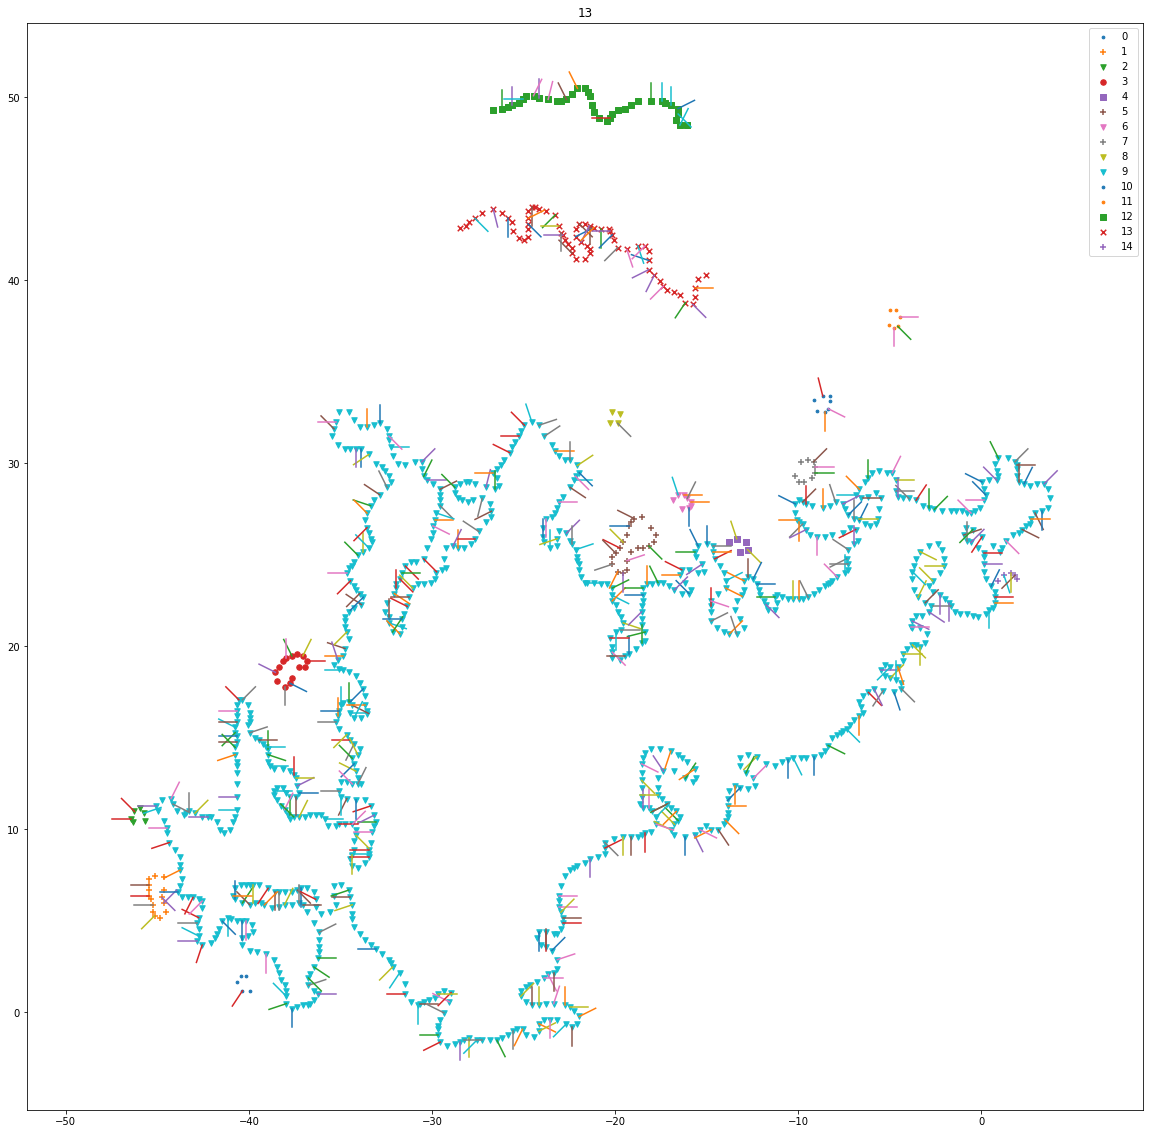

510
119.63493601972225


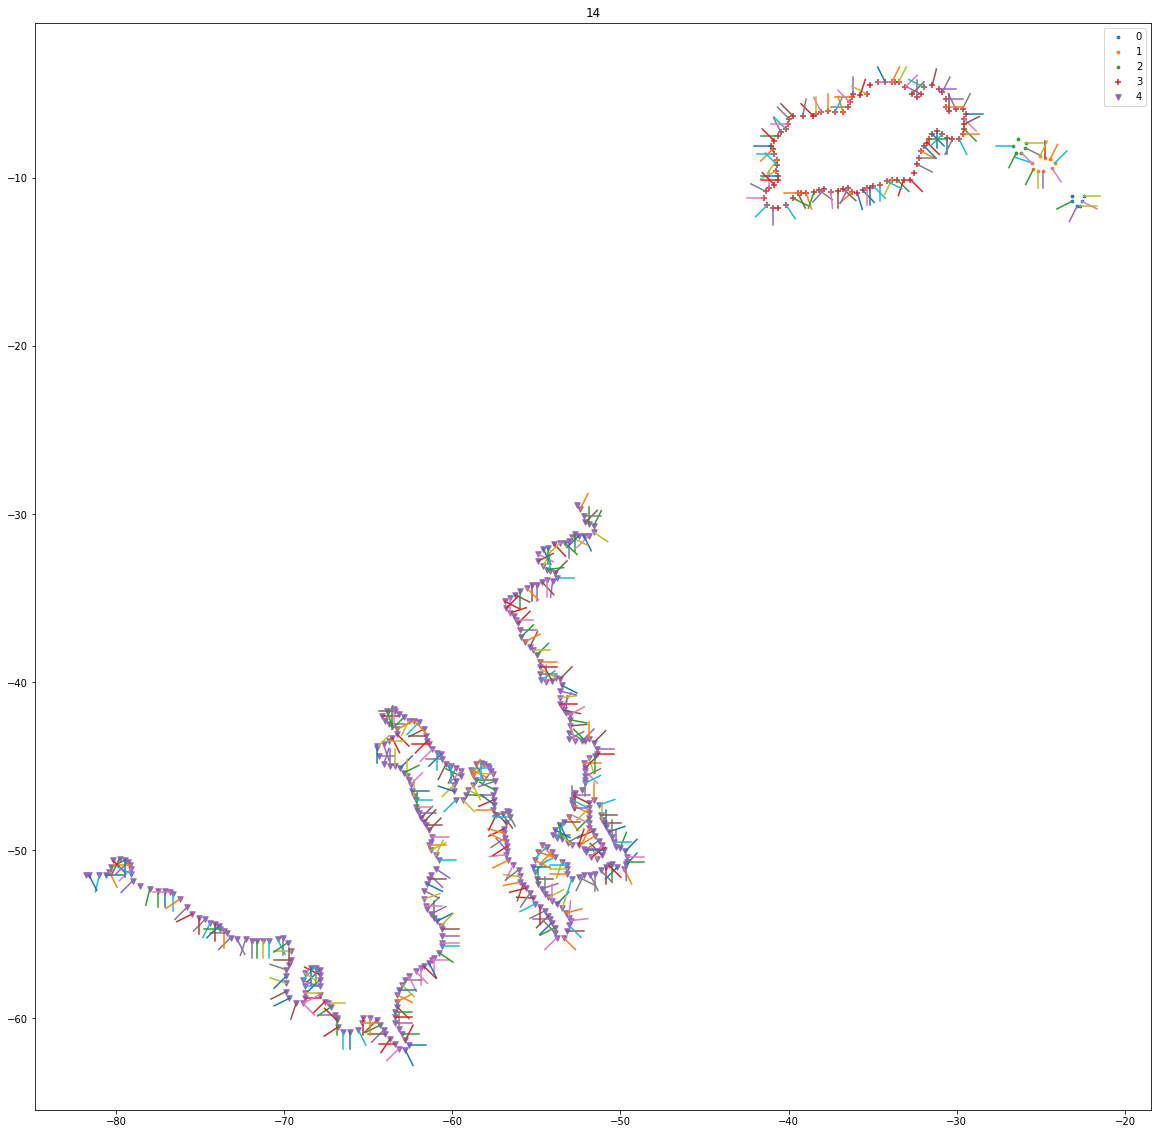

523
58.001047684552816


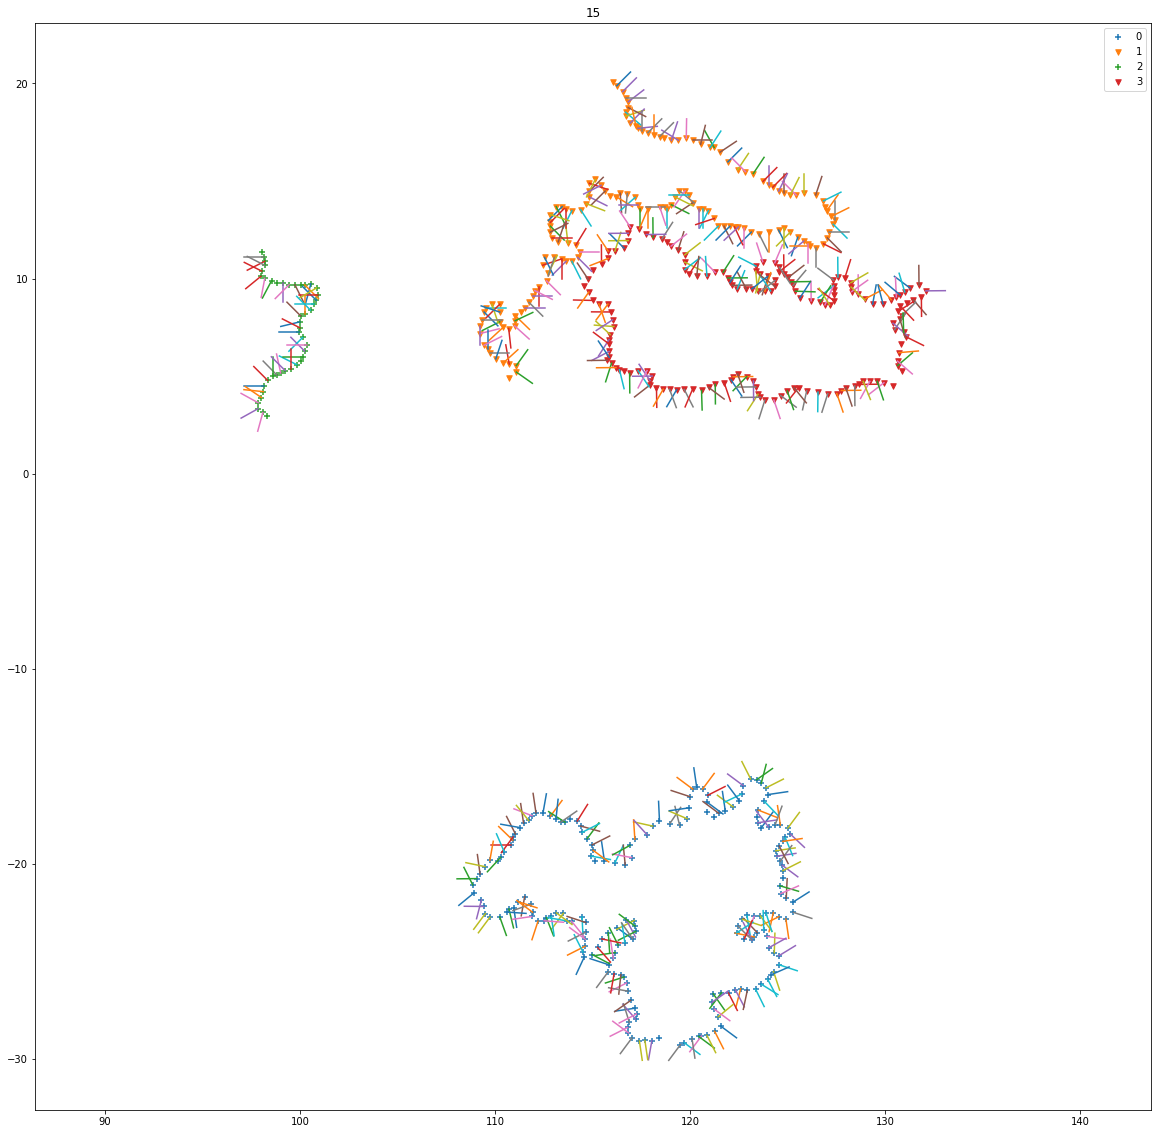

In [26]:
from scipy.optimize import linear_sum_assignment
import random

n_samples = 500

random.seed(43)

continents = []
coordinate_idxs = []

ans = {}


debuggs = []
for svg_idx, coasts in enumerate(orders_coast):
    plt.figure(figsize=(20,20))
    midpoints = []
    gradients = []
    debugs = []
    for coast_idx, coast in enumerate(coasts):
        debug = []
        for i, coordinate in enumerate(coast[:-1]):
            midpoint = [
                (coast[i][0]+coast[i+1][0])/2,
                (coast[i][1]+coast[i+1][1])/2,
            ]
#             plt.scatter(coordinate[0], coordinate[1], s=10)
            # trust me on this one. y,x -> x,-y for normal
            try:
                if flip[svg_idx][coast_idx]:
                    gradient = np.arctan2(-coast[i+1][0]+coast[i][0], -coast[i][1]+coast[i+1][1])
                else:
                    gradient = np.arctan2(coast[i+1][0]-coast[i][0], coast[i][1]-coast[i+1][1])
            except:
                gradient = np.arctan2(coast[i+1][0]-coast[i][0], coast[i][1]-coast[i+1][1])
    #         print(coordinate)
    #         print(coast[i+1])
    #         print(gradient)
    
            midpoints.append(midpoint)
            gradients.append(gradient)
            debug.append(midpoint)
        debugs.append(debug)
    debuggs.append(debugs)
    
    # filter midpoints
    filtered_midpoints = [midpoints[0]]
    filtered_gradients = [gradients[0]]
    for i in range(1,len(midpoints)-1):
        prv = np.array(midpoints[i-1])
        nxt = np.array(midpoints[i+1])
        if sum(abs(prv-nxt)) < 4:
            filtered_midpoints.append(midpoints[i])
            filtered_gradients.append(gradients[i])

    midpoints = filtered_midpoints
    gradients = filtered_gradients
    
    random.seed(1)
    print(len(midpoints))
    midpoints = random.sample(midpoints, 500)
    random.seed(1)
    gradients = random.sample(gradients, 500)
    
    # mapping of orders with svg sequence
    mapped_order = "The Order of " + svg_sequence[svg_idx]
    
    # get all data
    realms_directions = np.array([x[1] for x in orders[mapped_order]])
    realm_keys = [x[0] for x in orders[mapped_order]]

#     cost_matrix = np.outer(gradients, realms_directions)
    y = np.array([gradients])
    x = np.expand_dims(realms_directions, 0)
    cost_matrix = abs(y - x.T)
#     print(cost_matrix.shape)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # get the original order idx
    mapped_order_idx = list(order_data.keys()).index(svg_sequence[svg_idx])
    for idx, cidx in enumerate(col_ind):
        ans[realm_keys[idx]] = [mapped_order_idx, midpoints[cidx]]
        
    total_cost = 0
    for i in range(500):
        total_cost += abs(realms_directions[i]- gradients[col_ind[i]])
#         print(realms_directions[i], gradients[col_ind[i]])
    print(total_cost)
        
    for idx, debug in enumerate(debugs):
        cos = np.array(debug)
        plt.scatter(cos[:,0], cos[:,1], s=30, label=idx, marker=f"{random.choice(['o', '.', ',', 'x', '+', 'v'])}")
    for idx, midpoint in enumerate(midpoints):
        x = midpoint[0]
        y = midpoint[1]
        dx = np.cos(gradients[idx])
        dy = np.sin(gradients[idx])
        plt.plot([x,x+dx],[y,y+dy])
    plt.axis("equal")
    plt.title(svg_idx)
    plt.legend()
    plt.show()

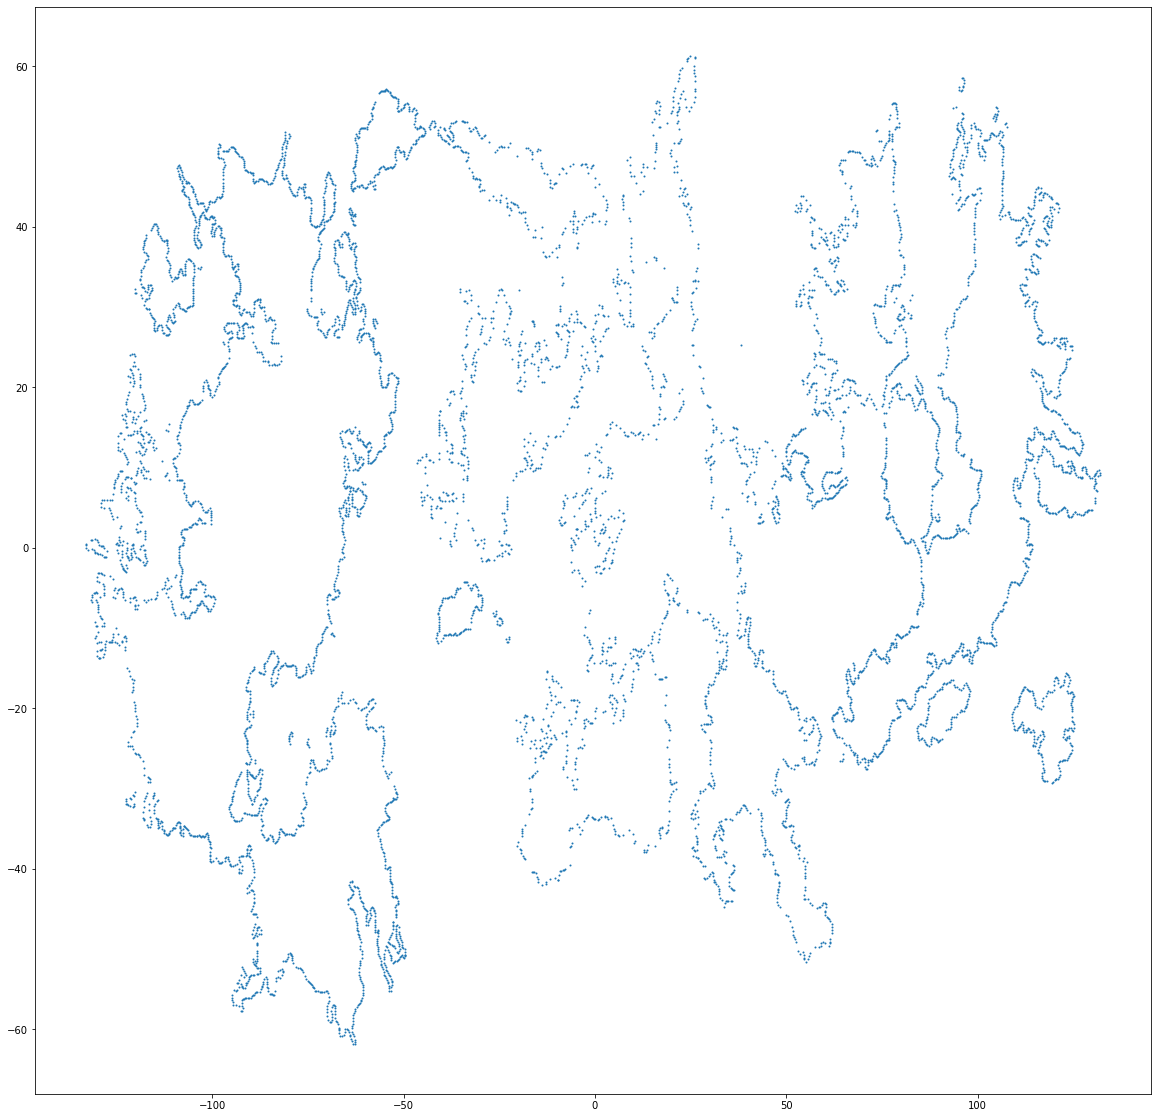

In [27]:
cos = np.array([v[1] for k,v in ans.items()])
plt.figure(figsize=(20,20))
plt.scatter(cos[:,0], cos[:,1], s=1)

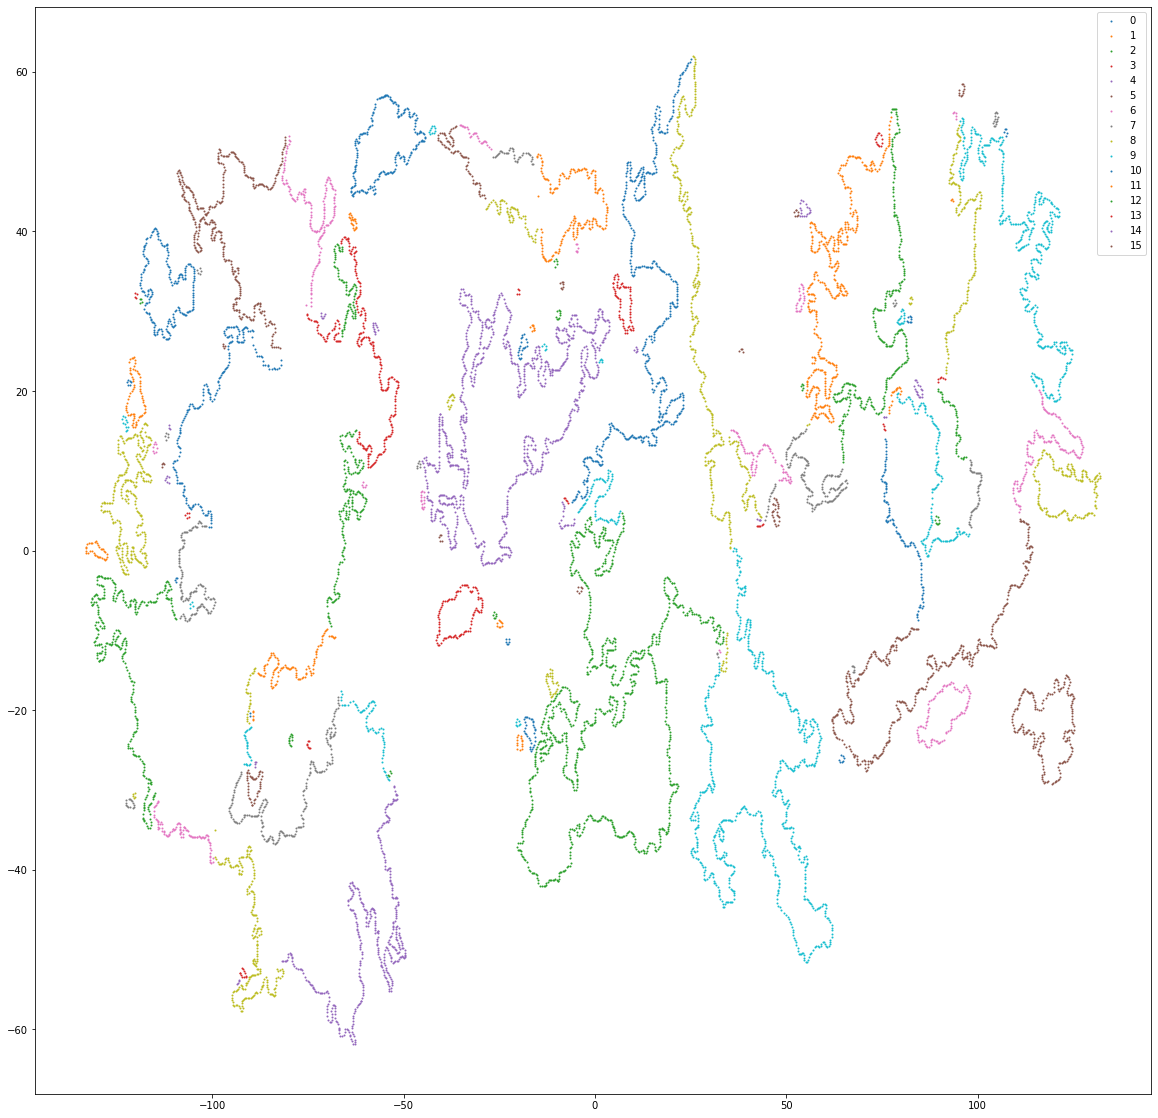

In [28]:
plt.figure(figsize=(20,20))
for debugs in debuggs:
    for debug in debugs:
        cos = np.array(debug)
        plt.scatter(cos[:,0], cos[:,1], s=1)
plt.legend(range(16))

In [29]:
materials = [
    'Stone',
     'Coal',
     'Wood',
     'Copper',
     'Ironwood',
     'Obsidian',
     'Gold',
     'Silver',
     'Mithral',
     'Alchemical Silver',
     'Cold Iron',
     'Deep Crystal',
     'Ruby',
     'Diamonds',
     'Hartwood',
     'Ignium',
     'Twilight Quartz',
     'True Ice',
     'Adamantine',
     'Sapphire',
     'Ethereal Silica',
     'Dragonhide'
]

In [30]:
data = []
for k, v in resources.items():
    attributes = {
        "regions": 0,
        "cities": 0,
        "harbors": 0,
        "rivers": 0,
        "resource": []
    }
    for att in v["attributes"]:
        trait = att["trait_type"].lower()
        value = att["value"]
        if trait == "resource":
            attributes[trait].append(value)
        else:
            attributes[trait] = value
    midpoint = ans[k][1]
    print(midpoint)
    data.append(
        {
            "name": int(k),
            "coordinates": eval(f"[{midpoint[0]:.4f},{midpoint[1]:.4f}]"),
            "resource": attributes["resource"]
        }
    )
data

[28.747118, -18.920000000000005]
[114.01328000000005, 0.5246469999999988]
[-107.48007799999999, 16.60041]
[-54.36695400000001, -33.310555]
[-92.280078, -54.59958400000001]
[-45.513743, 51.271323800000005]
[-114.3490152, 27.350372]
[-128.18, -5.199662000000001]
[-57.670083999999996, 45.74677200000001]
[113.60679000000007, -0.8031079999999974]
[-58.60472399999999, 12.525709]
[-58.752882, 45.68000000000001]
[75.64712, 26.08]
[79.74712, -20.92000800000001]
[-89.18, -15.099674000000004]
[-117.47999999999999, 17.400337999999998]
[94.44711999999998, 12.179999999999996]
[-89.48007799999999, -48.199609999999986]
[-105.88, -5.69965800000001]
[54.047118, -22.320000000000007]
[-118.88, 11.800338]
[126.67802999999972, 8.786482000000035]
[-127.88, -11.999662]
[75.74712000000004, -13.920000000000016]
[-117.88, 13.100338]
[30.747118, -9.620000000000005]
[99.74712000000004, -12.720008000000007]
[-42.692716000000004, 52.955664299999995]
[-40.052882, -6.820000000000005]
[9.647117999999999, 34.58]
[21.447

[92.07279999999986, -16.87681999999997]
[123.36298, -26.428980000000003]
[95.34711999999999, 30.480000000000004]
[-22.552881999999997, -11.420000000000005]
[114.52027999999984, -24.53618299999998]
[90.74712, 9.079999999999995]
[110.24704000000006, -4.420001999999999]
[128.2518199999997, 9.787844000000028]
[-123.47999999999999, -0.7996620000000008]
[10.447118, -36.52]
[-88.880078, -45.699609999999986]
[112.84711999999999, 12.879987999999997]
[-8.952881999999999, 2.8799999999999955]
[-36.752882, -6.1200000000000045]
[40.647118000000006, -33.02]
[121.24712, 13.079998]
[-28.552881999999997, 25.379999999999995]
[-56.822532999999986, -49.485840999999965]
[19.047118, -21.92]
[-51.87999999999998, -48.09965599999996]
[24.847118000000002, 40.879999999999995]
[50.447118, 10.479999999999995]
[-62.28007799999999, 9.70041]
[-58.580078, -20.099581999999998]
[-94.18008599999999, 30.200391999999994]
[-63.680077999999995, 12.400409999999999]
[-95.880078, 25.200409999999998]
[-74.38906999999998, 40.68086

[-123.17999999999999, -6.199662]
[64.08217200000004, -19.82243499999999]
[-5.152882, -27.620000000000005]
[-64.17999999999999, 32.500338]
[7.747118, -14.520000000000003]
[115.64712, 14.479987999999997]
[-62.180077999999995, 10.500409999999999]
[-56.152882, 47.379999999999995]
[-65.78007799999999, 8.10041]
[-65.58007799999999, 11.200409999999998]
[-51.652882, 54.78]
[-98.880078, -38.699609999999986]
[42.547118, -14.020000000000003]
[-107.780078, 8.400409999999999]
[95.04711999999999, 29.98]
[-62.58, 29.900337999999998]
[-89.580078, -33.299609999999994]
[20.547118, 56.97999999999999]
[-15.352882, -24.92]
[116.15515000000002, -19.953370000000014]
[-100.08007799999999, 18.80041]
[-2.452882, -33.720000000000006]
[-94.691016, -56.335131000000004]
[-129.18, -6.099662]
[-65.380078, 0.9004099999999994]
[-107.68, -35.89966199999999]
[-60.579994, -44.599641999999974]
[-67.180078, 27.30041]
[-83.280078, -53.99958199999999]
[-83.680078, -16.899590000000003]
[55.747118, 10.979999999999997]
[-75.3800

[{'name': 1, 'coordinates': [28.7471, -18.92], 'resource': ['Stone', 'Coal']},
 {'name': 2, 'coordinates': [114.0133, 0.5246], 'resource': ['Coal']},
 {'name': 3,
  'coordinates': [-107.4801, 16.6004],
  'resource': ['Wood', 'Stone', 'Copper']},
 {'name': 4,
  'coordinates': [-54.367, -33.3106],
  'resource': ['Copper', 'Wood', 'Ironwood', 'Obsidian', 'Coal', 'Stone']},
 {'name': 5, 'coordinates': [-92.2801, -54.5996], 'resource': ['Gold']},
 {'name': 6,
  'coordinates': [-45.5137, 51.2713],
  'resource': ['Copper', 'Coal', 'Wood']},
 {'name': 7,
  'coordinates': [-114.349, 27.3504],
  'resource': ['Coal', 'Copper', 'Wood']},
 {'name': 8,
  'coordinates': [-128.18, -5.1997],
  'resource': ['Wood', 'Silver', 'Stone', 'Coal']},
 {'name': 9,
  'coordinates': [-57.6701, 45.7468],
  'resource': ['Wood', 'Obsidian', 'Coal']},
 {'name': 10,
  'coordinates': [113.6068, -0.8031],
  'resource': ['Coal', 'Stone', 'Silver', 'Wood', 'Copper']},
 {'name': 11, 'coordinates': [-58.6047, 12.5257], 'res

In [31]:
with open("/data/projects/deck-gl-map/src/continents.js", "w") as file:
    file.write("var realms_data = [\n")
    for coordinate in data:
        file.write(f"  {coordinate},\n")
    file.write("];\n\n")
    
    file.write("var contour_data = [\n")
    for svg_idx, contours in enumerate(orders_contour):
        color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        for i, contour in enumerate(contours):
            file.write("  {\n")
            file.write("    contour: [\n      ")
            for c in contour:
                file.write(f"[{c[0]:.04f},{c[1]:.04f}],")
            file.write("\n")
            file.write("    ],\n")
            file.write(f"    order_idx: {list(order_data.keys()).index(svg_sequence[svg_idx])},\n")
            file.write(f"    color: {color}\n")
            file.write("  },\n")
    file.write("];\n\n")
        
    file.write("export {realms_data, contour_data};")

In [32]:
with open("/data/projects/react-game-client/continents.ts", "w") as file:
    file.write("""interface Realm {
  name: number;
  coordinates: number[];
  resource: Array<String>;
}\n\n""")
    file.write("var realms_data: Array<Realm> = [\n")
    for coordinate in data:
        file.write(f"  {coordinate},\n")
    file.write("];\n\n")
    
    file.write("var contour_data = [\n")
    for svg_idx, contours in enumerate(orders_contour):
        color = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        for i, contour in enumerate(contours):
            file.write("  {\n")
            file.write("    contour: [\n      ")
            for c in contour:
                file.write(f"[{c[0]:.04f},{c[1]:.04f}],")
            file.write("\n")
            file.write("    ],\n")
            file.write(f"    order_idx: {list(order_data.keys()).index(svg_sequence[svg_idx])},\n")
            file.write(f"    color: {color}\n")
            file.write("  },\n")
    file.write("];\n\n")
        
    file.write("export {realms_data, contour_data};")

In [33]:
resc = {}
for d in data:
    for r in d["resource"]:
        if r not in resc:
            resc[r] = 0
        else:
            resc[r] += 1
for r in resc:
    resc[r] /= 8000

In [34]:
sorted(resc.items(), key=lambda x: x[1], reverse=True)

[('Wood', 0.62675),
 ('Stone', 0.4925),
 ('Coal', 0.479),
 ('Copper', 0.33025),
 ('Obsidian', 0.276875),
 ('Silver', 0.2175),
 ('Ironwood', 0.14725),
 ('Cold Iron', 0.1195),
 ('Gold', 0.114125),
 ('Hartwood', 0.074125),
 ('Diamonds', 0.037375),
 ('Sapphire', 0.03075),
 ('Deep Crystal', 0.02975),
 ('Ruby', 0.02975),
 ('Ignium', 0.021375),
 ('Ethereal Silica', 0.020125),
 ('True Ice', 0.01725),
 ('Twilight Quartz', 0.01375),
 ('Alchemical Silver', 0.0115),
 ('Adamantine', 0.00675),
 ('Mithral', 0.0045),
 ('Dragonhide', 0.00275)]

# geojson

In [35]:
for k in orders:
    print(f'"{k}"')

"The Order of Giants"
"The Order of Perfection"
"The Order of Rage"
"The Order of the Fox"
"The Order of the Twins"
"The Order of Fury"
"The Order of Reflection"
"The Order of Detection"
"The Order of Skill"
"The Order of Brilliance"
"The Order of Protection"
"The Order of Power"
"The Order of Titans"
"The Order of Vitriol"
"The Order of Anger"
"The Order of Enlightenment"


In [36]:
features = []
for svg_idx, contours in enumerate(orders_contour):
    for contour in contours:
        dis = np.array(contour[0]) - np.array(contour[-1])
        total_dis = sum(np.abs(dis))
        if total_dis > 1e-3:
            closed_contour = contour+[contour[0]]
        else:
            closed_contour = contour
        features.append({
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [closed_contour]
            },
            "properties": {
                "order_idx": list(order_data.keys()).index(svg_sequence[svg_idx]),
                "order_name": svg_sequence[svg_idx]
            }
        })

# also add realms


In [37]:
with open("/data/projects/realms/world_data/datasources_json/geo.json", "w") as file:
    json.dump({
        "type": "FeatureCollection",
        "features": features
    }, file)

In [38]:
for i, d in enumerate(data):
    rdata = resources[str(i+1)]
    d["realm_idx"] = i+1
    d["name"] = rdata["name"]
    d["order"] = rdata["attributes"][-1]["value"]
    d["regions"] = rdata["attributes"][0]["value"]
    d["cities"] = rdata["attributes"][1]["value"]
    d["harbors"] = rdata["attributes"][2]["value"]
    d["rivers"] = rdata["attributes"][3]["value"]

In [39]:
# {
#   "type": "Feature",
#   "geometry": {
#     "type": "Point",
#     "coordinates": [125.6, 10.1]
#   },
#   "properties": {
#     "name": "Dinagat Islands"
#   }
# }
features = []
for d in data:
    f = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": d["coordinates"]
        },
        "properties": {
            "name": d["name"],
            "realm_idx": d["realm_idx"],
            "order": d["order"],
            "resources": d["resource"]
        }
    }
    features.append(f)

In [40]:
with open("/data/projects/realms/world_data/datasources_json/realms.json", "w") as file:
    json.dump({
        "type": "FeatureCollection",
        "features": features
    }, file)